# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings

In [2]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Setting the current working directory
import os;
os.chdir('/content/drive/My Drive/Colab Notebooks')

Mounted at /content/drive


In [5]:
import zipfile

if not os.path.exists("Datasets and Dictionary-NYC"):
  zip_ref = zipfile.ZipFile("Datasets and Dictionary-NYC.zip", 'r')
  zip_ref.extractall("Datasets and Dictionary-NYC")
  zip_ref.close()

In [6]:
dataset_path = "Datasets and Dictionary-NYC/Datasets and Dictionary"
trip_records_path = dataset_path + "/trip_records"
taxi_zones_path = dataset_path + "/taxi_zones"

# Try loading one file

df = pd.read_parquet(trip_records_path + '/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

In [7]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [8]:
df = pd.read_parquet(trip_records_path + '/2023-4.parquet')
df['tpep_pickup_datetime'].dt.date.unique()

array([datetime.date(2023, 8, 1), datetime.date(2023, 7, 31),
       datetime.date(2023, 8, 2), datetime.date(2023, 8, 3),
       datetime.date(2023, 8, 4), datetime.date(2023, 8, 5),
       datetime.date(2023, 8, 6), datetime.date(2023, 8, 7),
       datetime.date(2023, 8, 8), datetime.date(2023, 8, 9),
       datetime.date(2023, 8, 10), datetime.date(2009, 1, 1),
       datetime.date(2023, 8, 11), datetime.date(2023, 8, 12),
       datetime.date(2023, 8, 13), datetime.date(2023, 8, 14),
       datetime.date(2023, 8, 15), datetime.date(2023, 8, 16),
       datetime.date(2023, 8, 17), datetime.date(2023, 8, 18),
       datetime.date(2023, 8, 19), datetime.date(2023, 8, 20),
       datetime.date(2023, 8, 21), datetime.date(2023, 8, 22),
       datetime.date(2023, 8, 23), datetime.date(2023, 8, 24),
       datetime.date(2023, 8, 25), datetime.date(2023, 8, 26),
       datetime.date(2023, 8, 27), datetime.date(2023, 8, 28),
       datetime.date(2008, 12, 31), datetime.date(2023, 8, 29),
 

Years apart from 2023 also seem to be present in the dataframe

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [9]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [10]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files - trip_records_path

# Select the folder having data files
if os.getcwd() != '/content/drive/MyDrive/Colab Notebooks/' + trip_records_path:
  os.chdir(trip_records_path)

def get_dataframe():
  # Create a list of all the twelve files to read
  file_list = os.listdir()
  print(file_list)

  # initialise an empty dataframe
  df = pd.DataFrame()

  # Use Dask to read all Parquet files in parallel
  # ddf = dd.read_parquet(file_list)  # Using Dask instead of Pandas

  # iterate through the list of files and sample one by one:
  for file_name in file_list:
      try:
          # file path for the current file
          file_path = os.path.join(os.getcwd(), file_name)

          # Extract month from the filename
          file_month = int(file_name.split('-')[1].split('.')[0])

          # Reading the current file
          df_month = pd.read_parquet(file_path)

          # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
          # After completing iteration through each date, we will append this data to the final dataframe.
          sampled_data = pd.DataFrame()

          # Loop through dates and then loop through every hour of each date
          for date in df_month['tpep_pickup_datetime'].dt.date.unique():
              year = date.year  # Extract the year from the date
              month = date.month
              if year != 2023: #  & month != file_month
                  continue  # Skip the hour loop if year is not 2023
              # Iterate through each hour of the selected date
              for hour in range(24):
                  # Filter data for the current date and hour
                  print(f"File {file_name}: date {date} : hour {hour}")
                  hour_data = df_month[
                      (df_month['tpep_pickup_datetime'].dt.date == date) &
                      (df_month['tpep_pickup_datetime'].dt.hour == hour)
                  ]

                  # Sample 5% of the hourly data randomly
                  sample = hour_data.sample(frac=0.05, random_state=42)

                  # add data of this hour to the dataframe
                  sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

          # Concatenate the sampled data of all the dates to a single dataframe
          df = pd.concat([df, sampled_data], ignore_index=True)

      except Exception as e:
          print(f"Error reading file {file_name}: {e}")

  return df

if os.path.exists('sampled_data.parquet'):
    # If the Parquet file exists, read from it
    df = pd.read_parquet('sampled_data.parquet')
else:
    # If the file doesn't exist, perform the original data processing steps
    df = get_dataframe()
    df.to_parquet('sampled_data.parquet', index=False)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [11]:
# Store the df in csv/parquet
# df.to_parquet('')

In [12]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['year'] = df['tpep_pickup_datetime'].dt.year
df['month'] = df['tpep_pickup_datetime'].dt.month
df['day'] = df['tpep_pickup_datetime'].dt.day

unique_days_per_month = df.groupby(['year', 'month'])['day'].unique()

# Display options to prevent truncation
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

print(unique_days_per_month)

year  month
2023  1        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
      2                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 19, 20, 21, 23, 24, 25, 26, 27, 28]
      3        [31, 1, 7, 2, 8, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 20, 21, 15, 16, 22, 17, 18, 19, 26, 27, 28, 29, 23, 24, 25, 30]
      4            [1, 2, 3, 4, 10, 5, 11, 12, 6, 7, 8, 9, 17, 18, 13, 19, 14, 15, 16, 24, 25, 20, 26, 21, 22, 23, 27, 28, 29, 30]
      5        [1, 8, 2, 9, 3, 4, 10, 11, 5, 6, 7, 15, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
      6            [30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
      7        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
      8        [31, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [13]:
# Load the new data file

# Already done in previous step
#df = pd.read_parquet('sampled_data.parquet')

In [14]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN           4.71   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0           0.56   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0          18.46   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0          13.71   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0           0.71   

   RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0         NaN               None           113           238             0        24.83    0.0   
1         1.0                  N           142           142             2         5.10    1.0   
2         2.0                  N           132           163             1        70.00    0.0   
3         1.0                  N           249           180             4        59.70    1.0   
4         1.0                  N           144           232             1         7.90    1.0   

   mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0      0.5        4.32          0.00                    1.0         33.15                   NaN   
1      0.5        0.00          0.00                    1.0         10.10                   2.5   
2      0.5       15.71          6.94                    1.0         98.40                   2.5   
3      0.5        0.00          0.00                    1.0         64.70                   2.5   
4      0.5        2.00          0.00                    1.0         14.90                   2.5   

   Airport_fee  airport_fee  year  month  day  
0          NaN          NaN  2023      9    1  
1         0.00          NaN  2023      9    1  
2         1.75          NaN  2023      9    1  
3         0.00          NaN  2023      9    1  
4         0.00          NaN  2023      9    1

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896399 entries, 0 to 1896398
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [16]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.head()

# year, month and day columns can be deleted but we will keep them for later

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN           4.71   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0           0.56   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0          18.46   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0          13.71   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0           0.71   

   RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0         NaN               None           113           238             0        24.83    0.0   
1         1.0                  N           142           142             2         5.10    1.0   
2         2.0                  N           132           163             1        70.00    0.0   
3         1.0                  N           249           180             4        59.70    1.0   
4         1.0                  N           144           232             1         7.90    1.0   

   mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0      0.5        4.32          0.00                    1.0         33.15                   NaN   
1      0.5        0.00          0.00                    1.0         10.10                   2.5   
2      0.5       15.71          6.94                    1.0         98.40                   2.5   
3      0.5        0.00          0.00                    1.0         64.70                   2.5   
4      0.5        2.00          0.00                    1.0         14.90                   2.5   

   Airport_fee  airport_fee  year  month  day  
0          NaN          NaN  2023      9    1  
1         0.00          NaN  2023      9    1  
2         1.75          NaN  2023      9    1  
3         0.00          NaN  2023      9    1  
4         0.00          NaN  2023      9    1

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [17]:
# Combine the two airport fee columns
print(df['Airport_fee'].isnull().sum())
print(df['airport_fee'].isnull().sum())

# Fill NaN values in 'Airport_fee' with 0
df['Airport_fee'].fillna(0, inplace=True)
df['airport_fee'].fillna(0, inplace=True)

df['total_airport_fee'] = df['airport_fee'] + df['Airport_fee']
df.drop(['airport_fee', 'Airport_fee'], axis=1, inplace=True)
df.head()

213356
1747917


<ipython-input-17-482506b2cdbb>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Airport_fee'].fillna(0, inplace=True)
<ipython-input-17-482506b2cdbb>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN           4.71   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0           0.56   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0          18.46   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0          13.71   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0           0.71   

   RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0         NaN               None           113           238             0        24.83    0.0   
1         1.0                  N           142           142             2         5.10    1.0   
2         2.0                  N           132           163             1        70.00    0.0   
3         1.0                  N           249           180             4        59.70    1.0   
4         1.0                  N           144           232             1         7.90    1.0   

   mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0      0.5        4.32          0.00                    1.0         33.15                   NaN   
1      0.5        0.00          0.00                    1.0         10.10                   2.5   
2      0.5       15.71          6.94                    1.0         98.40                   2.5   
3      0.5        0.00          0.00                    1.0         64.70                   2.5   
4      0.5        2.00          0.00                    1.0         14.90                   2.5   

   year  month  day  total_airport_fee  
0  2023      9    1               0.00  
1  2023      9    1               0.00  
2  2023      9    1               1.75  
3  2023      9    1               0.00  
4  2023      9    1               0.00

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [18]:
# check where values of fare amount are negative
negative_fares = df[df['fare_amount'] < 0]
len(negative_fares)

0

Did you notice something different in the `RatecodeID` column for above records?

In [19]:
# Analyse RatecodeID for the negative fare amounts
df[df['fare_amount'] < 0]['RatecodeID'].unique()

array([], dtype=float64)

In [20]:
# Find columns with numeric data type containing negative values

def find_negative_values(df):
  numeric_cols = df.select_dtypes(include=np.number).columns
  negative_value_cols = []
  for col in numeric_cols:
      if (df[col] < 0).any():
          negative_value_cols.append(col)

  return negative_value_cols

negative_value_cols = find_negative_values(df)
negative_value_cols

['extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'total_airport_fee']

In [21]:
# Replace negative values with the mean of the respective columns
for col in negative_value_cols:
    mean_value = df[df[col] >= 0][col].mean()
    df.loc[df[col] < 0, col] = mean_value


In [22]:
negative_value_cols = find_negative_values(df)
negative_value_cols

[]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [23]:
# Find the proportion of missing values in each column
missing_values_proportion = df.isna().mean()
print(missing_values_proportion * 100)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.420905
trip_distance            0.000000
RatecodeID               3.420905
store_and_fwd_flag       3.420905
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.420905
year                     0.000000
month                    0.000000
day                      0.000000
total_airport_fee        0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [24]:
# Display the rows with null values
null_passenger_count = df[df['passenger_count'].isnull()]
null_passenger_count.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0           2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN           4.71   
85          2  2023-09-01 00:01:15   2023-09-01 00:07:07              NaN           1.07   
151         2  2023-09-01 01:58:13   2023-09-01 02:12:29              NaN           3.32   
203         2  2023-09-01 01:08:34   2023-09-01 01:20:38              NaN           2.67   
251         1  2023-09-01 02:29:04   2023-09-01 02:45:34              NaN           0.00   

     RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0           NaN               None           113           238             0        24.83    0.0   
85          NaN               None           148             4             0        11.88    0.0   
151         NaN               None           211           230             0        19.04    0.0   
203         NaN               None           144            65             0        19.89    0.0   
251         NaN               None            79            48             0        19.85    0.0   

     mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0        0.5        4.32           0.0                    1.0         33.15                   NaN   
85       0.5        2.00           0.0                    1.0         17.88                   NaN   
151      0.5        4.61           0.0                    1.0         27.65                   NaN   
203      0.5        4.30           0.0                    1.0         28.19                   NaN   
251      0.5        0.00           0.0                    1.0         23.85                   NaN   

     year  month  day  total_airport_fee  
0    2023      9    1                0.0  
85   2023      9    1                0.0  
151  2023      9    1                0.0  
203  2023      9    1                0.0  
251  2023      9    1                0.0

In [25]:
# Impute NaN values in 'passenger_count'
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].mean())

print("\nDataFrame after replacing NaN with column mean:")
df.head()


DataFrame after replacing NaN with column mean:


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28         1.369215           4.71   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19         2.000000           0.56   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02         2.000000          18.46   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20         2.000000          13.71   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56         1.000000           0.71   

   RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0         NaN               None           113           238             0        24.83    0.0   
1         1.0                  N           142           142             2         5.10    1.0   
2         2.0                  N           132           163             1        70.00    0.0   
3         1.0                  N           249           180             4        59.70    1.0   
4         1.0                  N           144           232             1         7.90    1.0   

   mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0      0.5        4.32          0.00                    1.0         33.15                   NaN   
1      0.5        0.00          0.00                    1.0         10.10                   2.5   
2      0.5       15.71          6.94                    1.0         98.40                   2.5   
3      0.5        0.00          0.00                    1.0         64.70                   2.5   
4      0.5        2.00          0.00                    1.0         14.90                   2.5   

   year  month  day  total_airport_fee  
0  2023      9    1               0.00  
1  2023      9    1               0.00  
2  2023      9    1               1.75  
3  2023      9    1               0.00  
4  2023      9    1               0.00

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [26]:
# Display the rows with null values
null_RatecodeID = df[df['RatecodeID'].isnull()]
null_RatecodeID.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0           2  2023-09-01 00:39:59   2023-09-01 01:00:28         1.369215           4.71   
85          2  2023-09-01 00:01:15   2023-09-01 00:07:07         1.369215           1.07   
151         2  2023-09-01 01:58:13   2023-09-01 02:12:29         1.369215           3.32   
203         2  2023-09-01 01:08:34   2023-09-01 01:20:38         1.369215           2.67   
251         1  2023-09-01 02:29:04   2023-09-01 02:45:34         1.369215           0.00   

     RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0           NaN               None           113           238             0        24.83    0.0   
85          NaN               None           148             4             0        11.88    0.0   
151         NaN               None           211           230             0        19.04    0.0   
203         NaN               None           144            65             0        19.89    0.0   
251         NaN               None            79            48             0        19.85    0.0   

     mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0        0.5        4.32           0.0                    1.0         33.15                   NaN   
85       0.5        2.00           0.0                    1.0         17.88                   NaN   
151      0.5        4.61           0.0                    1.0         27.65                   NaN   
203      0.5        4.30           0.0                    1.0         28.19                   NaN   
251      0.5        0.00           0.0                    1.0         23.85                   NaN   

     year  month  day  total_airport_fee  
0    2023      9    1                0.0  
85   2023      9    1                0.0  
151  2023      9    1                0.0  
203  2023      9    1                0.0  
251  2023      9    1                0.0

In [27]:
# Impute NaN values in 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mean())

print("\nDataFrame after replacing NaN with column mean:")
df.head()


DataFrame after replacing NaN with column mean:


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28         1.369215           4.71   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19         2.000000           0.56   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02         2.000000          18.46   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20         2.000000          13.71   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56         1.000000           0.71   

   RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0    1.634694               None           113           238             0        24.83    0.0   
1    1.000000                  N           142           142             2         5.10    1.0   
2    2.000000                  N           132           163             1        70.00    0.0   
3    1.000000                  N           249           180             4        59.70    1.0   
4    1.000000                  N           144           232             1         7.90    1.0   

   mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0      0.5        4.32          0.00                    1.0         33.15                   NaN   
1      0.5        0.00          0.00                    1.0         10.10                   2.5   
2      0.5       15.71          6.94                    1.0         98.40                   2.5   
3      0.5        0.00          0.00                    1.0         64.70                   2.5   
4      0.5        2.00          0.00                    1.0         14.90                   2.5   

   year  month  day  total_airport_fee  
0  2023      9    1               0.00  
1  2023      9    1               0.00  
2  2023      9    1               1.75  
3  2023      9    1               0.00  
4  2023      9    1               0.00

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [28]:
# Display the rows with null values
null_congestion_surcharge = df[df['congestion_surcharge'].isnull()]
null_congestion_surcharge.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0           2  2023-09-01 00:39:59   2023-09-01 01:00:28         1.369215           4.71   
85          2  2023-09-01 00:01:15   2023-09-01 00:07:07         1.369215           1.07   
151         2  2023-09-01 01:58:13   2023-09-01 02:12:29         1.369215           3.32   
203         2  2023-09-01 01:08:34   2023-09-01 01:20:38         1.369215           2.67   
251         1  2023-09-01 02:29:04   2023-09-01 02:45:34         1.369215           0.00   

     RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0      1.634694               None           113           238             0        24.83    0.0   
85     1.634694               None           148             4             0        11.88    0.0   
151    1.634694               None           211           230             0        19.04    0.0   
203    1.634694               None           144            65             0        19.89    0.0   
251    1.634694               None            79            48             0        19.85    0.0   

     mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0        0.5        4.32           0.0                    1.0         33.15                   NaN   
85       0.5        2.00           0.0                    1.0         17.88                   NaN   
151      0.5        4.61           0.0                    1.0         27.65                   NaN   
203      0.5        4.30           0.0                    1.0         28.19                   NaN   
251      0.5        0.00           0.0                    1.0         23.85                   NaN   

     year  month  day  total_airport_fee  
0    2023      9    1                0.0  
85   2023      9    1                0.0  
151  2023      9    1                0.0  
203  2023      9    1                0.0  
251  2023      9    1                0.0

In [29]:
# Impute NaN values in 'congestion_surcharge'
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].mean())

print("\nDataFrame after replacing NaN with column mean:")
df.head()


DataFrame after replacing NaN with column mean:


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28         1.369215           4.71   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19         2.000000           0.56   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02         2.000000          18.46   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20         2.000000          13.71   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56         1.000000           0.71   

   RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0    1.634694               None           113           238             0        24.83    0.0   
1    1.000000                  N           142           142             2         5.10    1.0   
2    2.000000                  N           132           163             1        70.00    0.0   
3    1.000000                  N           249           180             4        59.70    1.0   
4    1.000000                  N           144           232             1         7.90    1.0   

   mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0      0.5        4.32          0.00                    1.0         33.15              2.307671   
1      0.5        0.00          0.00                    1.0         10.10              2.500000   
2      0.5       15.71          6.94                    1.0         98.40              2.500000   
3      0.5        0.00          0.00                    1.0         64.70              2.500000   
4      0.5        2.00          0.00                    1.0         14.90              2.500000   

   year  month  day  total_airport_fee  
0  2023      9    1               0.00  
1  2023      9    1               0.00  
2  2023      9    1               1.75  
3  2023      9    1               0.00  
4  2023      9    1               0.00

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [30]:
# Handle any remaining missing values
# Remove rows where 'store_and_fwd_flag' is null

df.dropna(subset=['store_and_fwd_flag'], inplace=True)
print(len(df))
df.head()

1831525


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0           0.56   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0          18.46   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0          13.71   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0           0.71   
5         2  2023-09-01 00:41:08   2023-09-01 00:54:33              5.0           4.39   

   RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
1         1.0                  N           142           142             2          5.1    1.0   
2         2.0                  N           132           163             1         70.0    0.0   
3         1.0                  N           249           180             4         59.7    1.0   
4         1.0                  N           144           232             1          7.9    1.0   
5         1.0                  N            79           263             1         19.1    1.0   

   mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
1      0.5        0.00          0.00                    1.0         10.10                   2.5   
2      0.5       15.71          6.94                    1.0         98.40                   2.5   
3      0.5        0.00          0.00                    1.0         64.70                   2.5   
4      0.5        2.00          0.00                    1.0         14.90                   2.5   
5      0.5        4.82          0.00                    1.0         28.92                   2.5   

   year  month  day  total_airport_fee  
1  2023      9    1               0.00  
2  2023      9    1               1.75  
3  2023      9    1               0.00  
4  2023      9    1               0.00  
5  2023      9    1               0.00

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [31]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()



VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  passenger_count  \
count  1.831525e+06                     1831525                     1831525     1.831525e+06   
mean   1.736310e+00  2023-07-01 21:16:14.309531  2023-07-01 21:33:36.264374     1.369215e+00   
min    1.000000e+00         2023-01-01 00:00:57         2023-01-01 00:09:35     0.000000e+00   
25%    1.000000e+00         2023-04-01 20:11:51         2023-04-01 20:27:01     1.000000e+00   
50%    2.000000e+00         2023-06-26 08:20:50         2023-06-26 08:37:48     1.000000e+00   
75%    2.000000e+00         2023-10-05 19:16:55         2023-10-05 19:34:40     1.000000e+00   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55     9.000000e+00   
std    4.406333e-01                         NaN                         NaN     8.927562e-01   

       trip_distance    RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count   1.831525e+06  1.831525e+06  1.831525e+06  1.831525e+06  1.831525e+06  1.831525e+06   
mean    3.551521e+00  1.634694e+00  1.654592e+02  1.643361e+02  1.205041e+00  1.982545e+01   
min     0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%     1.050000e+00  1.000000e+00  1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00   
50%     1.780000e+00  1.000000e+00  1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01   
75%     3.370000e+00  1.000000e+00  2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01   
max     5.682380e+04  9.900000e+01  2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05   
std     4.992573e+01  7.393917e+00  6.367336e+01  6.974136e+01  4.665563e-01  1.073556e+02   

              extra       mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.831525e+06  1.831525e+06  1.831525e+06  1.831525e+06           1.831525e+06   
mean   1.638213e+00  4.953383e-01  3.573663e+00  5.958434e-01           9.992986e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%    0.000000e+00  5.000000e-01  1.000000e+00  0.000000e+00           1.000000e+00   
50%    1.000000e+00  5.000000e-01  2.860000e+00  0.000000e+00           1.000000e+00   
75%    2.500000e+00  5.000000e-01  4.450000e+00  0.000000e+00           1.000000e+00   
max    1.425000e+01  4.000000e+00  2.230800e+02  1.430000e+02           1.000000e+00   
std    1.836118e+00  4.836703e-02  4.071617e+00  2.183941e+00           2.463941e-02   

       total_amount  congestion_surcharge       year         month           day  \
count  1.831525e+06          1.831525e+06  1831525.0  1.831525e+06  1.831525e+06   
mean   2.895016e+01          2.307671e+00     2023.0  6.509392e+00  1.550735e+01   
min    0.000000e+00          0.000000e+00     2023.0  1.000000e+00  1.000000e+00   
25%    1.596000e+01          2.500000e+00     2023.0  4.000000e+00  8.000000e+00   
50%    2.100000e+01          2.500000e+00     2023.0  6.000000e+00  1.500000e+01   
75%    3.070000e+01          2.500000e+00     2023.0  1.000000e+01  2.300000e+01   
max    1.431675e+05          2.500000e+00     2023.0  1.200000e+01  3.100000e+01   
std    1.082332e+02          6.661967e-01        0.0  3.462676e+00  8.699993e+00   

       total_airport_fee  
count       1.831525e+06  
mean        1.429121e-01  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         1.750000e+00  
std         4.648449e-01

In [32]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Get numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Detect and print percentage of outliers for each numerical column
for col in numerical_cols:
    outliers = detect_outliers_iqr(df[col])
    percentage_outliers = outliers.mean() * 100  # Calculate percentage
    print(f"Column '{col}': Percentage of outliers detected: {percentage_outliers:.2f}%")

Column 'VendorID': Percentage of outliers detected: 0.00%
Column 'passenger_count': Percentage of outliers detected: 24.80%
Column 'trip_distance': Percentage of outliers detected: 13.22%
Column 'RatecodeID': Percentage of outliers detected: 5.58%
Column 'PULocationID': Percentage of outliers detected: 0.00%
Column 'DOLocationID': Percentage of outliers detected: 0.00%
Column 'payment_type': Percentage of outliers detected: 18.52%
Column 'fare_amount': Percentage of outliers detected: 10.46%
Column 'extra': Percentage of outliers detected: 1.84%
Column 'mta_tax': Percentage of outliers detected: 0.94%
Column 'tip_amount': Percentage of outliers detected: 7.73%
Column 'tolls_amount': Percentage of outliers detected: 8.12%
Column 'improvement_surcharge': Percentage of outliers detected: 0.09%
Column 'total_amount': Percentage of outliers detected: 11.75%
Column 'congestion_surcharge': Percentage of outliers detected: 7.70%
Column 'year': Percentage of outliers detected: 0.00%
Column 'mon

In [33]:
# Identify columns with a high percentage of outliers
columns_to_handle = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'total_airport_fee']

# Handle outliers using winsorization
for col in columns_to_handle:
    df[col] = np.clip(df[col], df[col].quantile(0.01), df[col].quantile(0.99))

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [34]:
# remove passenger_count > 6
print("Number of rows before outlier handling:", len(df))
df = df[df['passenger_count'] <= 6]
print(df['passenger_count'].unique())
print("Number of rows after outlier handling:", len(df))

Number of rows before outlier handling: 1831525
[2. 1. 5. 4. 3. 0.]
Number of rows after outlier handling: 1831525


In [35]:
# Continue with outlier handling
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
df = df[~(((df['trip_distance'] == 0) & (df['fare_amount'] == 0)) & (df['PULocationID'] != df['DOLocationID']))]
print("Number of rows after outlier handling:", len(df))

#Entries where trip_distance is more than 250 miles.
print("Number of rows before outlier handling:", len(df))
df = df[df['trip_distance'] <= 250]
print("Number of rows after outlier handling:", len(df))

#Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
print("Number of rows before outlier handling:", len(df))
df = df[df['payment_type'] != 0]
print("Number of rows after outlier handling:", len(df))

# Identify columns with a high percentage of outliers
columns_to_handle = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'total_airport_fee']

# Handle outliers using winsorization
for col in columns_to_handle:
    df[col] = np.clip(df[col], df[col].quantile(0.01), df[col].quantile(0.99))

# Handling specific outlier scenarios
print("Number of rows before outlier handling:", len(df))

# 1.  trip_distance near 0 and fare_amount > 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

# 2. trip_distance and fare_amount are 0 but different pickup/dropoff zones
df = df[~(((df['trip_distance'] == 0) & (df['fare_amount'] == 0)) & (df['PULocationID'] != df['DOLocationID']))]

# 3. trip_distance > 250 miles
df = df[df['trip_distance'] <= 250]

# 4. payment_type == 0 (invalid)
df = df[df['payment_type'] != 0]

# 5. passenger_count > 6 (assuming a reasonable upper limit)
df = df[df['passenger_count'] <= 6]

# 6. Negative values in fare-related columns (already handled in 2.1.3, but double-checking)
for col in ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'total_airport_fee']:
    df = df[df[col] >= 0]


print("Number of rows after outlier handling:", len(df))









Number of rows after outlier handling: 1831525
Number of rows before outlier handling: 1831525
Number of rows after outlier handling: 1831525
Number of rows before outlier handling: 1831525
Number of rows after outlier handling: 1831525
Number of rows before outlier handling: 1831525
Number of rows after outlier handling: 1831525


In [36]:
# Assuming 'df' is your DataFrame and you want to standardize the 'fare_amount' column.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to your data and transform the 'fare_amount' column
df['fare_amount_standardized'] = scaler.fit_transform(df[['fare_amount']])

# Now, 'fare_amount_standardized' contains the standardized values.
# The original 'fare_amount' column remains unchanged.


In [37]:
# Do any columns need standardising?
#standardize the 'fare_amount' column.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to your data and transform the 'fare_amount' column
df['fare_amount_standardized'] = scaler.fit_transform(df[['fare_amount']])




## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [38]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'year',
 'month',
 'day',
 'total_airport_fee',
 'fare_amount_standardized']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

Categorical Variables:
VendorID.

RatecodeID.

PULocationID.

DOLocationID.

payment_type

Numerical Variables:

tpep_pickup_datetime

tpep_dropoff_datetime

passenger_count

trip_distance

pickup_hour

trip_duration

The following monetary parameters belong in thenumerical category.

fare_amount

extra

mta_tax

tip_amount

tolls_amount

improvement_surcharge

total_amount

congestion_surcharge

airport_fee


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

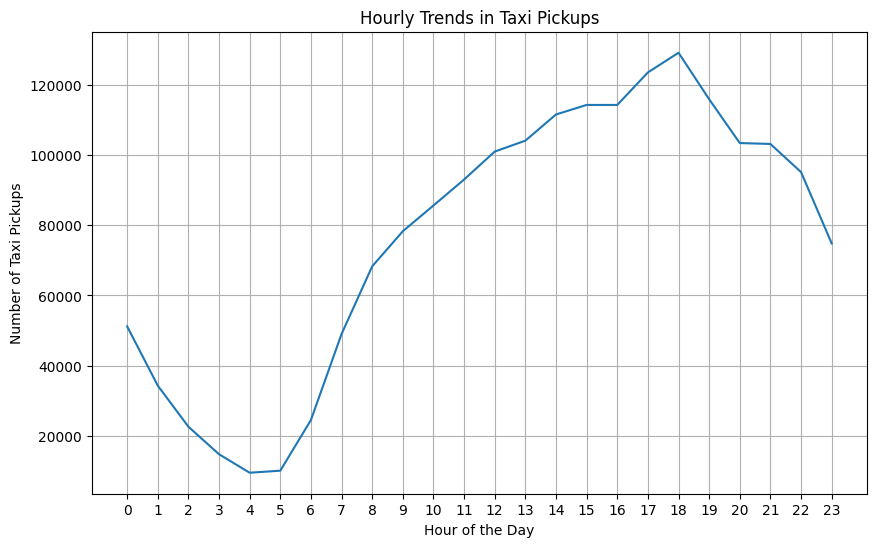

In [39]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_trends = df.groupby('pickup_hour')['pickup_hour'].count()

# Plotting hourly trends
plt.figure(figsize=(10, 6))
plt.plot(hourly_trends.index, hourly_trends.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Taxi Pickups')
plt.title('Hourly Trends in Taxi Pickups')
plt.xticks(range(24))  # Show all 24 hours on the x-axis
plt.grid(True)
plt.show()



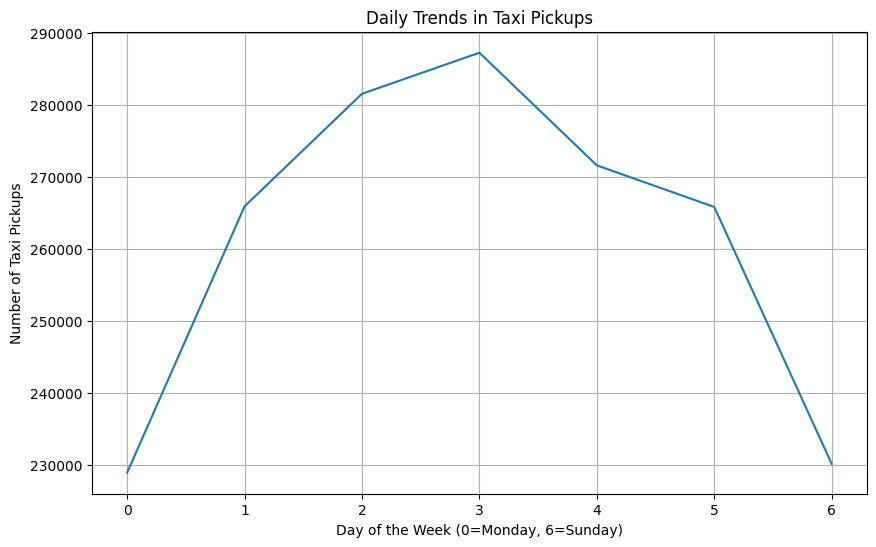

In [40]:
# Find and show the daily trends in taxi pickups (days of the week)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
daily_trends = df.groupby('day_of_week')['day_of_week'].count()

# Plotting daily trends
plt.figure(figsize=(10, 6))
plt.plot(daily_trends.index, daily_trends.values)
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Taxi Pickups')
plt.title('Daily Trends in Taxi Pickups')
plt.xticks(range(7))  # Show all 7 days on the x-axis
plt.grid(True)
plt.show()




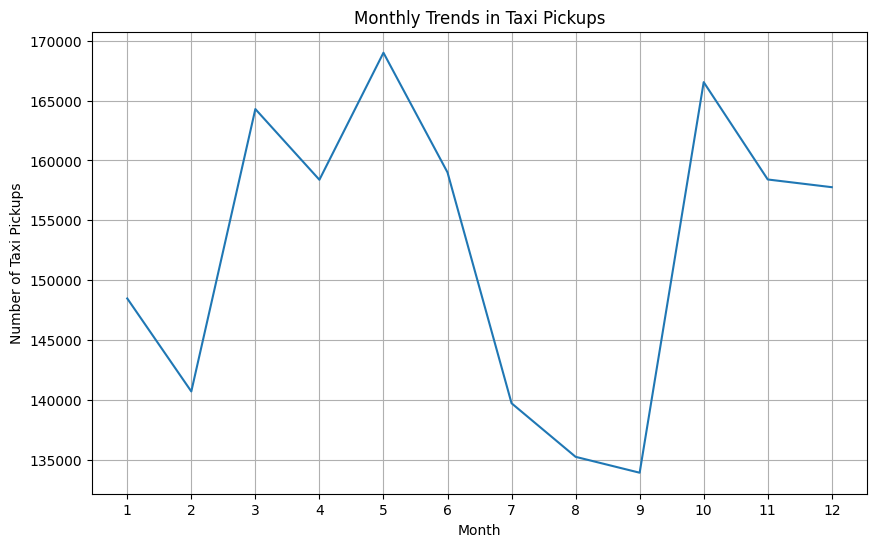

In [41]:
# Show the monthly trends in pickups
monthly_trends = df.groupby('month')['month'].count()

# Plotting monthly trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_trends.index, monthly_trends.values)
plt.xlabel('Month')
plt.ylabel('Number of Taxi Pickups')
plt.title('Monthly Trends in Taxi Pickups')
plt.xticks(range(1, 13))  # Show all 12 months on the x-axis
plt.grid(True)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [42]:
# Analyse the above parameters
financial_cols = ['fare_amount', 'tip_amount', 'total_amount']
distance_col = 'trip_distance'

for col in financial_cols:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col}:")
    print(f"  Zero values: {zero_count}")
    print(f"  Negative values: {negative_count}")

zero_distance_count = (df[distance_col] == 0).sum()
negative_distance_count = (df[distance_col] < 0).sum()
print(f"\n{distance_col}:")
print(f"  Zero values: {zero_distance_count}")
print(f"  Negative values: {negative_distance_count}")




fare_amount:
  Zero values: 0
  Negative values: 0
tip_amount:
  Zero values: 410335
  Negative values: 0
total_amount:
  Zero values: 0
  Negative values: 0

trip_distance:
  Zero values: 23032
  Negative values: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [43]:
# Create a df with non zero entries for the selected parameters.
columns_to_filter = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Create a new DataFrame with rows where all specified columns have non-zero values
df_non_zero = df[(df[columns_to_filter] > 0).all(axis=1)]

# Now 'df_non_zero' contains only the rows that meet the criteria.
print(df_non_zero.head())




   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0          18.46   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0           0.71   
5         2  2023-09-01 00:41:08   2023-09-01 00:54:33              5.0           4.39   
6         2  2023-09-01 00:07:47   2023-09-01 00:18:46              1.0           1.76   
7         2  2023-09-01 00:46:19   2023-09-01 01:00:11              1.0           6.32   

   RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
2         2.0                  N           132           163             1         70.0    0.0   
4         1.0                  N           144           232             1          7.9    1.0   
5         1.0                  N            79           263             1         19.1    1.0   
6         1.0                  N            48           143       

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

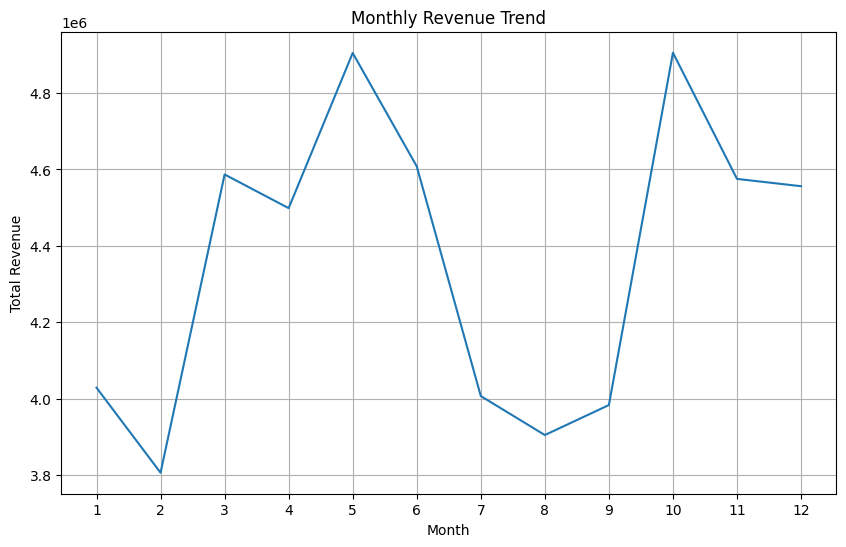

In [44]:
# Group data by month and analyse monthly revenue
monthly_revenue = df.groupby('month')['total_amount'].sum()

# Plotting monthly revenue trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(range(1, 13))  # Ensure all months are displayed on the x-axis
plt.grid(True)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

quarter
1    0.237221
2    0.267565
3    0.227166
4    0.268048
Name: total_amount, dtype: float64


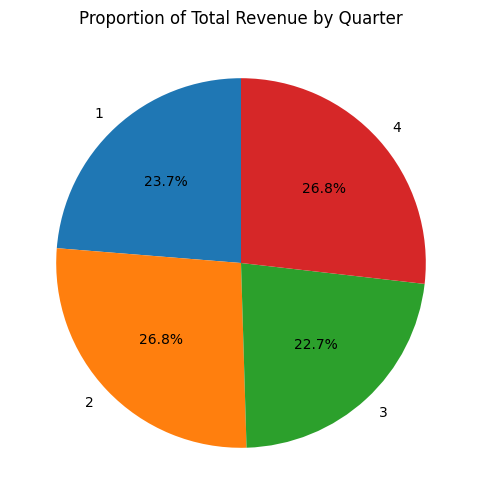

In [45]:
# Calculate proportion of each quarter
df['quarter'] = df['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum()

# Calculate the proportion of each quarter
total_revenue = quarterly_revenue.sum()
quarterly_proportion = quarterly_revenue / total_revenue

print(quarterly_proportion)

# Plotting the quarterly revenue proportion
plt.figure(figsize=(8, 6))
plt.pie(quarterly_proportion, labels=quarterly_proportion.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Total Revenue by Quarter')
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

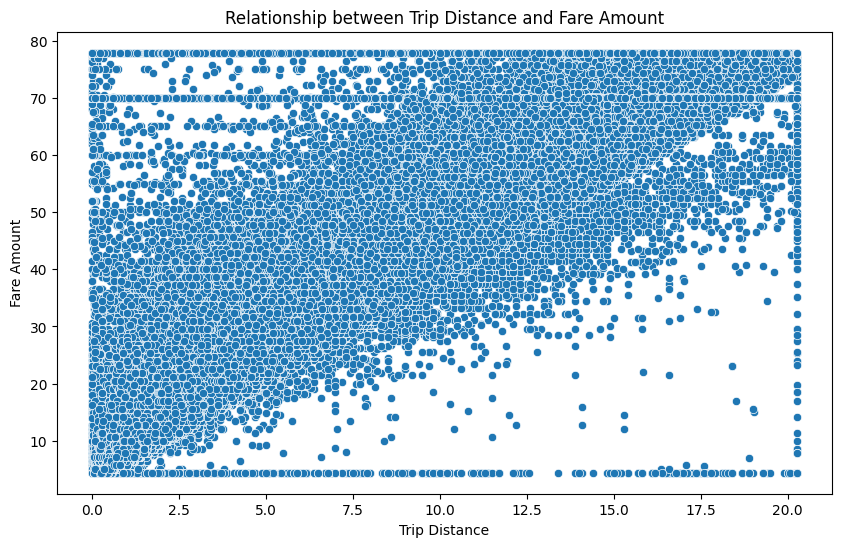

Correlation between trip_distance and fare_amount: 0.9564009483467227


In [46]:
# Show how trip fare is affected by distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df[df['trip_distance'] > 0])
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Relationship between Trip Distance and Fare Amount')
plt.show()

# Calculate the correlation between trip_distance and fare_amount
correlation = df[df['trip_distance'] > 0]['trip_distance'].corr(df[df['trip_distance'] > 0]['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation}")



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

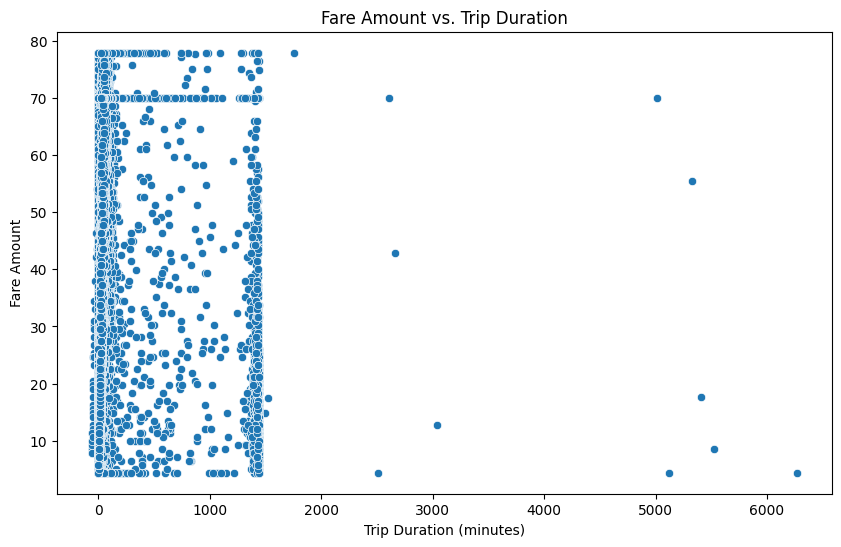

Correlation between fare_amount and trip_duration: 0.27415257647110675


In [47]:
# Show relationship between fare and trip duration
#Calculate trip duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount')
plt.title('Fare Amount vs. Trip Duration')
plt.show()

correlation_fare_duration = df['fare_amount'].corr(df['trip_duration'])
print(f"Correlation between fare_amount and trip_duration: {correlation_fare_duration}")





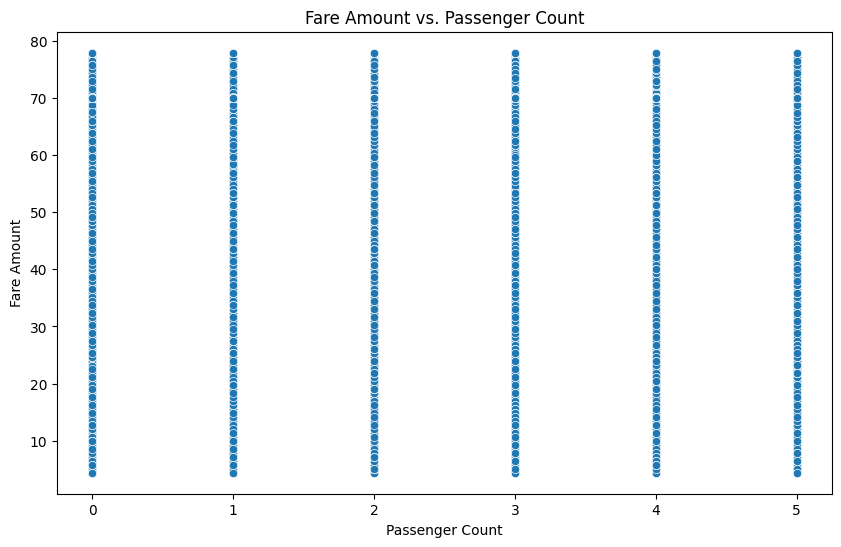

Correlation between fare_amount and passenger_count: 0.05037945607111473


In [48]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df)
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.title('Fare Amount vs. Passenger Count')
plt.show()

correlation_fare_passenger = df['fare_amount'].corr(df['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {correlation_fare_passenger}")



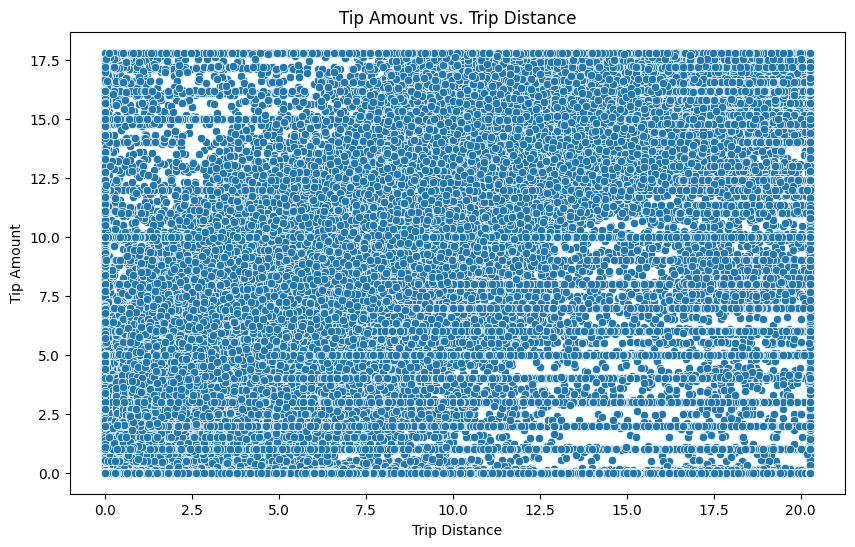

Correlation between tip_amount and trip_distance: 0.5988541285531447


In [49]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df)
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.title('Tip Amount vs. Trip Distance')
plt.show()

correlation_tip_distance = df['tip_amount'].corr(df['trip_distance'])
print(f"Correlation between tip_amount and trip_distance: {correlation_tip_distance}")



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    1492373
2     316452
4      13685
3       9015
Name: count, dtype: int64


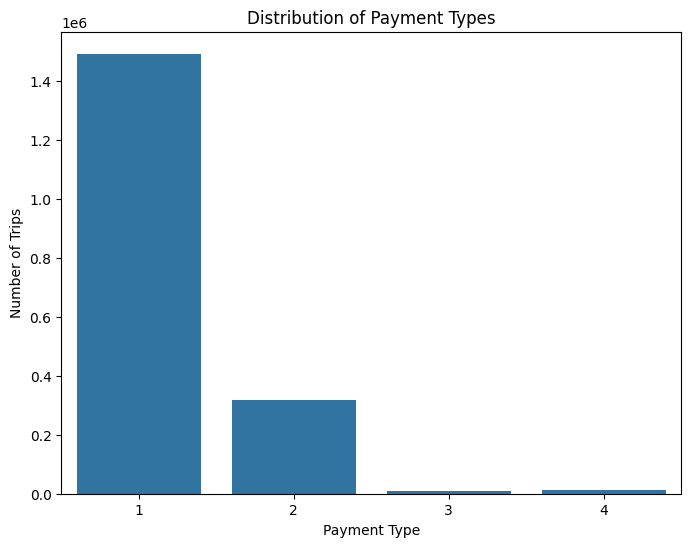

In [50]:
# Analyse the distribution of different payment types (payment_type).
payment_type_counts = df['payment_type'].value_counts()
print(payment_type_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', data=df)
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.title('Distribution of Payment Types')
plt.show()




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [51]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [52]:
# import geopandas as gpd
import geopandas as gpd
import os;
os.chdir('/content/drive/My Drive/Colab Notebooks')


# Read the shapefile using geopandas
zones = gpd.read_file(taxi_zones_path+'/taxi_zones.shp')
print("Shapefile loaded successfully.")
# Display the first few rows of the GeoDataFrame
print(zones.head())




Shapefile loaded successfully.
   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID        borough  \
0         1    0.116357    0.000782           Newark Airport           1            EWR   
1         2    0.433470    0.004866              Jamaica Bay           2         Queens   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3          Bronx   
3         4    0.043567    0.000112            Alphabet City           4      Manhattan   
4         5    0.092146    0.000498            Arden Heights           5  Staten Island   

                                                                                                                                                                                                                                                                                                                                                                                                                                      

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

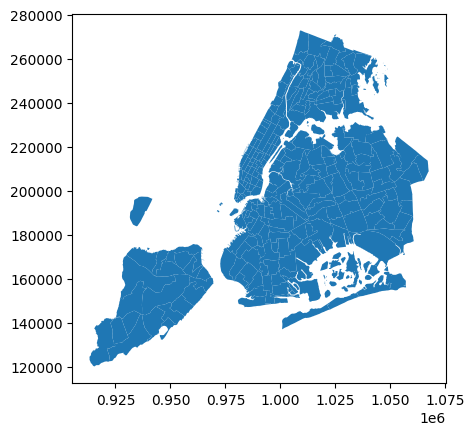

In [53]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [54]:
# Merge zones and trip records using locationID and PULocationID
df = pd.merge(df, zones[['LocationID', 'zone', 'borough', 'geometry']], left_on='PULocationID', right_on='LocationID', how='left', suffixes=('', '_PU'))

# Drop the redundant 'LocationID' column created during the merge
df.drop('LocationID', axis=1, inplace=True)

# Rename the merged zone and borough columns for clarity
df.rename(columns={'zone': 'PU_zone', 'borough': 'PU_borough', 'geometry': 'PU_geometry'}, inplace=True)


# Merge the trip records with the zones data for dropoff locations
df = pd.merge(df, zones[['LocationID', 'zone', 'borough', 'geometry']], left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('', '_DO'))

# Drop the redundant 'LocationID' column created during the merge
df.drop('LocationID', axis=1, inplace=True)

# Rename the merged zone and borough columns for clarity
df.rename(columns={'zone': 'DO_zone', 'borough': 'DO_borough', 'geometry': 'DO_geometry'}, inplace=True)

# Now 'df' contains the merged information from both DataFrames.
print(df.head())




   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0           0.56   
1         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0          18.46   
2         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0          13.71   
3         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0           0.71   
4         2  2023-09-01 00:41:08   2023-09-01 00:54:33              5.0           4.39   

   RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0         1.0                  N           142           142             2          5.1    1.0   
1         2.0                  N           132           163             1         70.0    0.0   
2         1.0                  N           249           180             4         59.7    1.0   
3         1.0                  N           144           232       

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [55]:
# Group data by location and calculate the number of trips
trips_per_location = df.groupby('PULocationID')['PULocationID'].count()
print(trips_per_location)

# Group data by PU_zone and count the number of trips
trips_per_zone = df.groupby('PU_zone')['PU_zone'].count()
trips_per_zone



PULocationID
1        214
2          2
3         40
4       1862
5         13
6         24
7        871
8          6
9         24
10       576
11        27
12       821
13     10560
14       115
15        19
16        30
17       155
18        68
19        42
20        29
21        47
22        56
23        35
24      4478
25       594
26        59
27         1
28       176
29        49
31        12
32        50
33       669
34        25
35       157
36        83
37       108
38        64
39       189
40       192
41      3879
42      1378
43     30754
44        16
45      2475
46         4
47        57
48     48799
49       184
50     11324
51       164
52       317
53        31
54        28
55       110
56       264
57         2
58         3
59         2
60        46
61       292
62        88
63        38
64        14
65      1043
66       467
67        31
68     47801
69       136
70      8368
71        94
72       113
73        16
74      3632
75     10387
76       263
77        70

PU_zone
Allerton/Pelham Gardens                   40
Alphabet City                           1862
Arden Heights                             13
Arrochar/Fort Wadsworth                   24
Astoria                                  871
Astoria Park                               6
Auburndale                                24
Baisley Park                             576
Bath Beach                                27
Battery Park                             821
Battery Park City                      10560
Bay Ridge                                115
Bay Terrace/Fort Totten                   19
Bayside                                   30
Bedford                                  155
Bedford Park                              68
Bellerose                                 42
Belmont                                   29
Bensonhurst East                          47
Bensonhurst West                          56
Bloomfield/Emerson Hill                   35
Bloomingdale                            4478
Boerum Hill                              594
Borough Park                              59
Breezy Point/Fort Tilden/Riis Beach        1
Briarwood/Jamaica Hills                  176
Brighton Beach                            49
Bronx Park                                12
Bronxdale                                 50
Brooklyn Heights                         669
Brooklyn Navy Yard                        25
Brownsville                              157
Bushwick North                            83
Bushwick South                           108
Cambria Heights                           64
Canarsie                                 189
Carroll Gardens                          192
Central Harlem                          3879
Central Harlem North                    1378
Central Park                           30754
Charleston/Tottenville                    16
Chinatown                               2475
City Island                                4
Claremont/Bathgate                        57
Clinton East                           48799
Clinton Hill                             184
Clinton West                           11324
Co-Op City                               164
Cobble Hill                              317
College Point                             31
Columbia Street                           28
Coney Island                             110
Corona                                   264
Country Club                               3
Crotona Park                               2
Crotona Park East                         46
Crown Heights North                      292
Crown Heights South                       88
Cypress Hills                             38
DUMBO/Vinegar Hill                       467
Douglaston                                14
Downtown Brooklyn/MetroTech             1043
Dyker Heights                             31
East Chelsea                           47801
East Concourse/Concourse Village         136
East Elmhurst                           8368
East Flatbush/Farragut                    94
East Flatbush/Remsen Village             113
East Flushing                             16
East Harlem North                       3632
East Harlem South                      10387
East New York                            263
East New York/Pennsylvania Avenue         70
East Tremont                              78
East Village                           43002
East Williamsburg                        275
Eastchester                               52
Elmhurst                                 217
Elmhurst/Maspeth                          79
Eltingville/Annadale/Prince's Bay          1
Erasmus                                   57
Far Rockaway                              96
Financial District North                9338
Financial District South                4852
Flatbush/Ditmas Park                     193
Flatiron                               29642
Flatlands                                135
Flushing                                 100
Flushing Meadows-Corona Park    

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [56]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trips_per_location, left_on='LocationID', right_index=True, how='left')

# Rename the merged column
zones.rename(columns={'PULocationID': 'trip_count'}, inplace=True)






The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

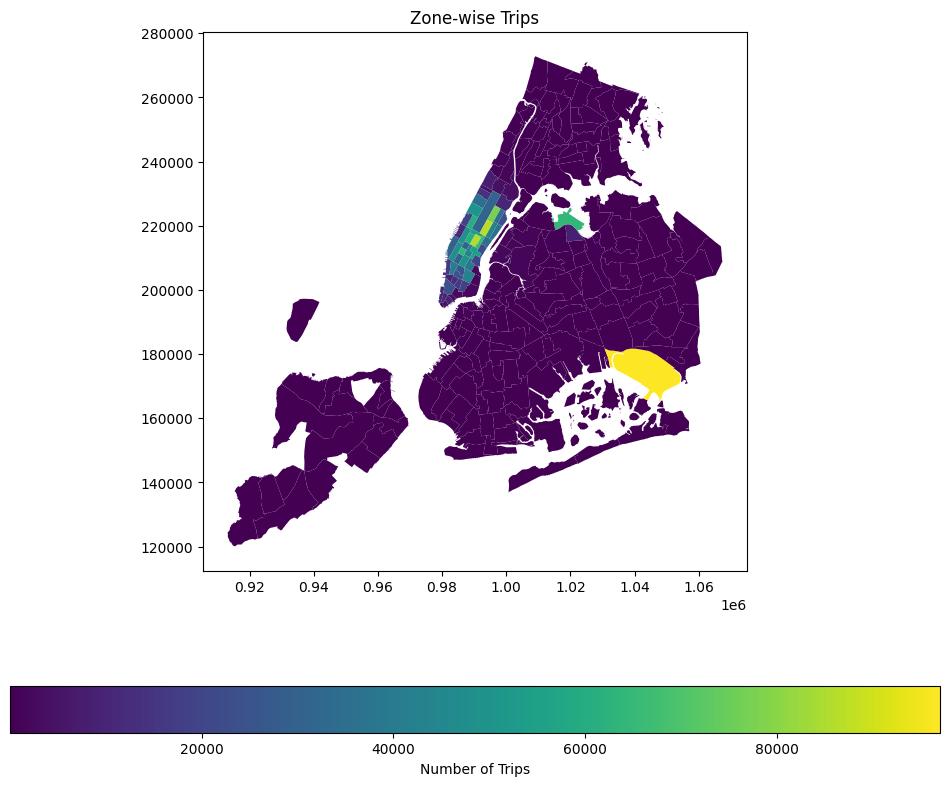

In [57]:
# Define figure and axis


# Plot the map and display it
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

zones.plot(column='trip_count',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})

plt.title('Zone-wise Trips')
plt.show()



In [58]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by='trip_count', ascending=False)

# Display the sorted DataFrame
zones_sorted.head(20)



OBJECTID  Shape_Leng  Shape_Area                          zone  LocationID    borough  \
131       132    0.245479    0.002038                   JFK Airport         132     Queens   
236       237    0.042213    0.000096         Upper East Side South         237  Manhattan   
160       161    0.035804    0.000072                Midtown Center         161  Manhattan   
235       236    0.044252    0.000103         Upper East Side North         236  Manhattan   
161       162    0.035270    0.000048                  Midtown East         162  Manhattan   
137       138    0.107467    0.000537             LaGuardia Airport         138     Queens   
185       186    0.024696    0.000037  Penn Station/Madison Sq West         186  Manhattan   
229       230    0.031028    0.000056     Times Sq/Theatre District         230  Manhattan   
141       142    0.038176    0.000076           Lincoln Square East         142  Manhattan   
169       170    0.045769    0.000074                   Murray Hill         170  Manhattan   
162       163    0.034177    0.000041                 Midtown North         163  Manhattan   
238       239    0.063626    0.000205         Upper West Side South         239  Manhattan   
233       234    0.036072    0.000073                      Union Sq         234  Manhattan   
47         48    0.043747    0.000094                  Clinton East          48  Manhattan   
67         68    0.049337    0.000111                  East Chelsea          68  Manhattan   
140       141    0.041514    0.000077               Lenox Hill West         141  Manhattan   
78         79    0.042625    0.000108                  East Village          79  Manhattan   
163       164    0.035772    0.000056                 Midtown South         164  Manhattan   
248       249    0.036384    0.000072                  West Village         249  Manhattan   
106       107    0.038041    0.000075                      Gramercy         107  Manhattan   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


Busiest Hours, Days, and Months
Busiest Hours: Peak activity occur during morning and evening rush hours (e.g., 8:00–10:00 AM and 5:00–7:00 PM). Late-night hours on weekends could also show a spike due to nightlife travel.

Busiest Days: Fridays and Saturdays tend to see higher trip volumes compared to weekdays, as they include commutes and social activities.

Busiest Months: Higher activity might occur during specific seasons—summer months often have more travel, while weather events or holidays (e.g., December) can also increase demand.

2. Trends in Revenue Collected
Revenue might show steady growth during busy hours and days.

A noticeable dip may occur during off-peak times such as late morning (11:00 AM–2:00 PM) on weekdays.

Monthly and annual revenue trends might follow patterns of increased tourism or holiday seasons.

3. Trends in Quarterly Revenue
Q1 (Jan-Mar): Revenue might dip post-holiday season but could recover toward March due to spring travel.

Q2 (Apr-Jun): Higher revenues might be observed due to good weather and tourism activities.

Q3 (Jul-Sep): This quarter typically captures the summer peak, depending on travel trends.

Q4 (Oct-Dec): Revenues might peak again during the holiday season with increased travel and festivities.

4. How Fare Depends on Trip Distance, Trip Duration, and Passenger Counts
Trip Distance: Fare is directly proportional to distance; longer trips generate higher fares.

Trip Duration: Fares could increase with trip duration due to waiting times or heavy traffic.

Passenger Count: Some services might apply surcharges for higher passenger counts, but this may vary.

5. How Tip Amount Depends on Trip Distance
Tips tend to increase with longer trip distances, but the relationship might not always be linear. Factors such as service quality, convenience, or fare size could influence tipping behavior.

6. Busiest Zones
Pickup and drop-off locations around major hubs like airports, railway stations, business districts, and entertainment areas are likely the busiest zones.

Residential areas may show higher activity during morning and evening commute times.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Group data by pickup location, dropoff location, and hour
grouped_data = df.groupby(['PULocationID', 'DOLocationID', 'hour'])

# Calculate average trip duration for each group
average_trip_durations = grouped_data['trip_duration'].mean().reset_index()

# Calculate speed for each route in each hour
average_trip_durations['speed'] = average_trip_durations.apply(lambda row: (df[df['PULocationID'] == row['PULocationID']]['trip_distance'].mean() / row['trip_duration']) if not pd.isna(row['trip_duration']) else 0 , axis = 1)

# Find the routes with the slowest average speed for each hour
slowest_routes_by_hour = average_trip_durations.loc[average_trip_durations.groupby('hour')['speed'].idxmin()]

# Print the results
print(slowest_routes_by_hour)

# Alternatively to display the results more clearly
for hour, row in slowest_routes_by_hour.iterrows():
    print(f"Hour {int(row['hour'])}: Slowest route from PULocationID {int(row['PULocationID'])} to DOLocationID {int(row['DOLocationID'])} with speed {row['speed']:.2f}")




How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

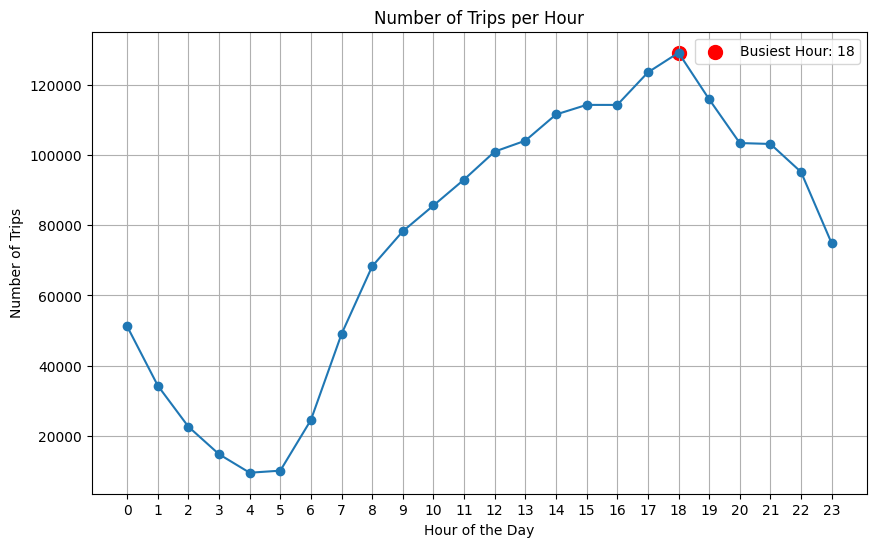

The busiest hour is: 18


In [60]:
# Visualise the number of trips per hour and find the busiest hour
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains a 'tpep_pickup_datetime' column
# Convert 'tpep_pickup_datetime' to datetime objects if it's not already
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the hour from the pickup datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Count the number of trips per hour
trips_per_hour = df.groupby('hour')['hour'].count()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(trips_per_hour.index, trips_per_hour.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Hour')
plt.xticks(range(24))  # Ensure all hours are displayed on the x-axis
plt.grid(True)

# Highlight the busiest hour
plt.scatter(busiest_hour, trips_per_hour.max(), color='red', s=100, label=f'Busiest Hour: {busiest_hour}')
plt.legend()
plt.show()

print(f"The busiest hour is: {busiest_hour}")



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [61]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sampling_fraction = 0.1  # Replace with your actual sampling fraction

# Scale up the number of trips for the five busiest hours
trips_per_hour_scaled = trips_per_hour / sampling_fraction

# Find the five busiest hours
five_busiest_hours = trips_per_hour_scaled.nlargest(5)

print("Five Busiest Hours (Scaled):")
five_busiest_hours


Five Busiest Hours (Scaled):


hour
18    1292300.0
17    1236170.0
19    1159560.0
15    1143490.0
16    1143420.0
Name: hour, dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

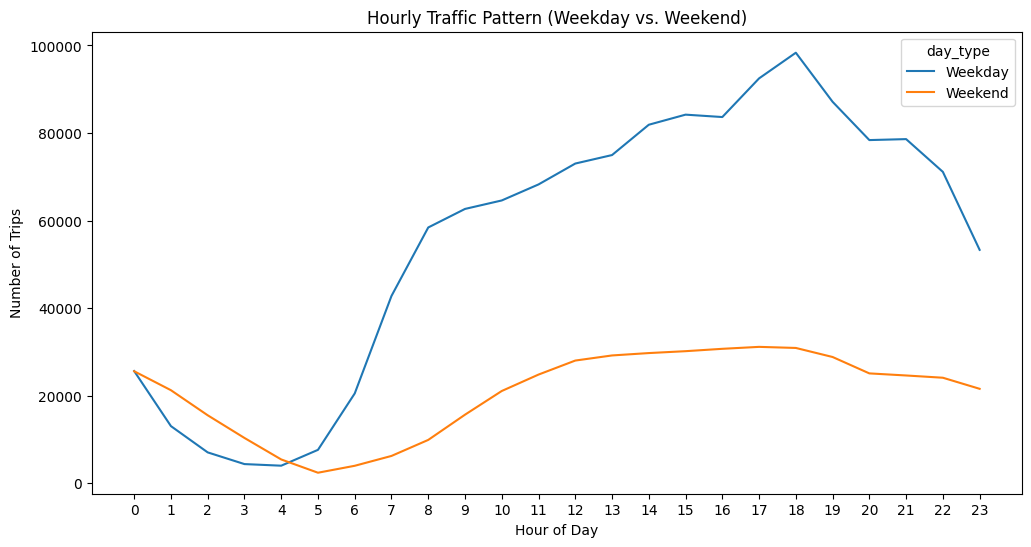

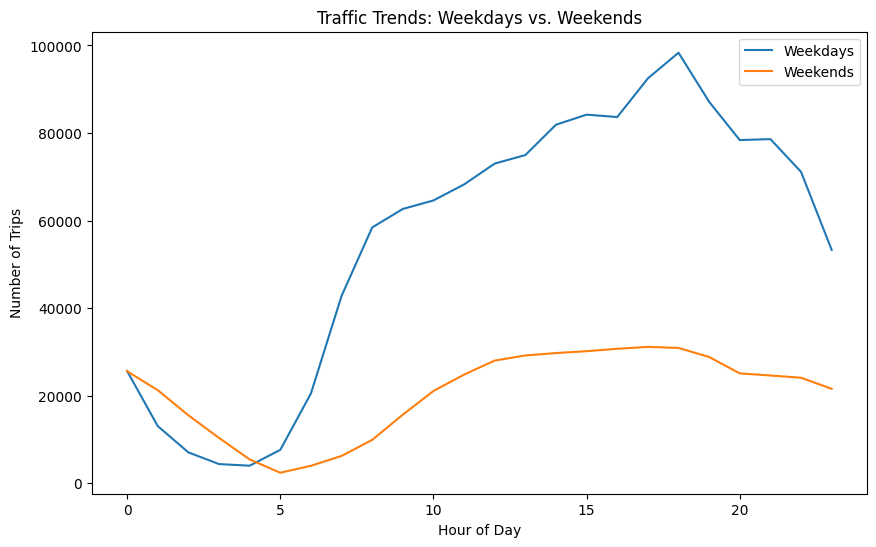

In [62]:
# Compare traffic trends for the week days and weekends
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the day of the week (0=Monday, 6=Sunday) and hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Categorize as weekday or weekend
df['day_type'] = np.where(df['day_of_week'] < 5, 'Weekday', 'Weekend')

# Group data by day type and hour, then count trips
hourly_traffic = df.groupby(['day_type', 'hour'])['hour'].count().reset_index(name='trip_count')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='trip_count', hue='day_type', data=hourly_traffic)
plt.title('Hourly Traffic Pattern (Weekday vs. Weekend)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.show()

# Compare traffic trends for weekdays and weekends
weekday_traffic = hourly_traffic[hourly_traffic['day_type'] == 'Weekday'].set_index('hour')['trip_count']
weekend_traffic = hourly_traffic[hourly_traffic['day_type'] == 'Weekend'].set_index('hour')['trip_count']

plt.figure(figsize=(10, 6))
plt.plot(weekday_traffic.index, weekday_traffic.values, label='Weekdays')
plt.plot(weekend_traffic.index, weekend_traffic.values, label='Weekends')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Traffic Trends: Weekdays vs. Weekends")
plt.legend()
plt.show()




What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

We can predict the chances of booking and pricing of trips. As we can see that week days are busier than weekends, so there are high chances that trip will be booked easily and without any surcharges.
On the other hand, Busy hours can be painful for us as trip will not be booked easily and may be there is surcharges also applied.
So finding busy and quiet hours can help us so much in deciding when to take a trip and can save Time and Money.

# New Section

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

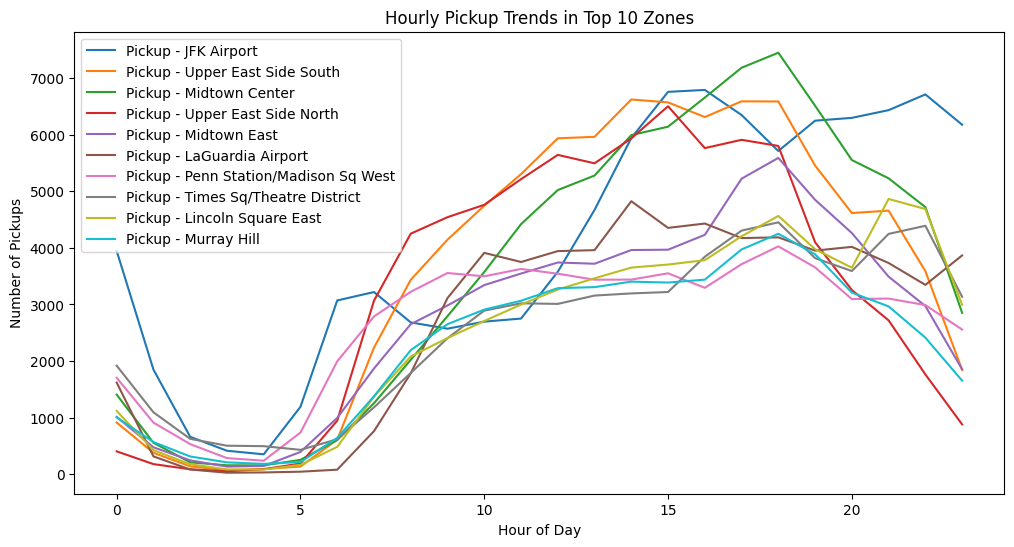

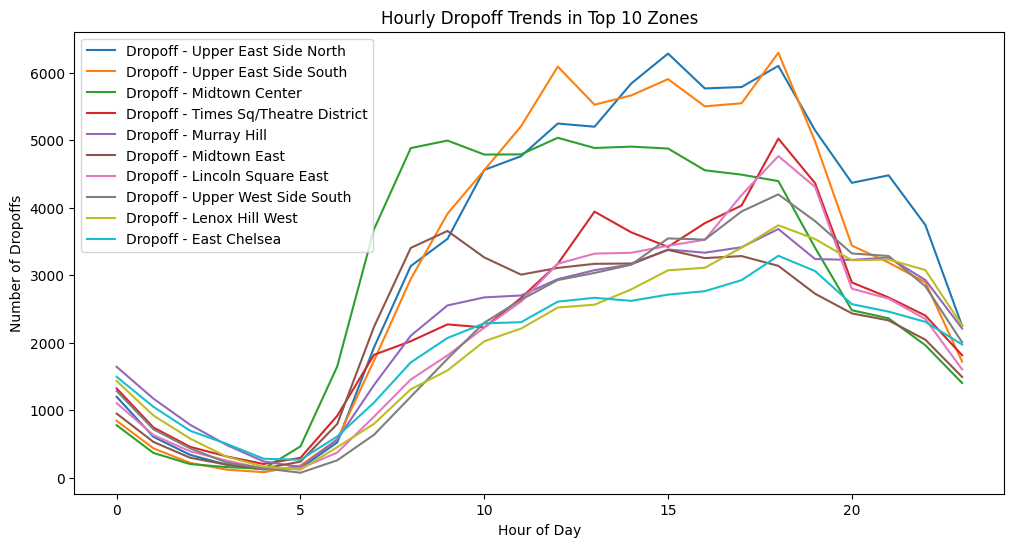

Top 10 Pickup Zones Overall:
 PU_zone
JFK Airport                     97029
Upper East Side South           86912
Midtown Center                  85959
Upper East Side North           77519
Midtown East                    65638
LaGuardia Airport               64288
Penn Station/Madison Sq West    63483
Times Sq/Theatre District       61321
Lincoln Square East             60891
Murray Hill                     54498
Name: PU_zone, dtype: int64
Top 10 Dropoff Zones Overall:
 DO_zone
Upper East Side North        81270
Upper East Side South        77561
Midtown Center               71650
Times Sq/Theatre District    56404
Murray Hill                  54316
Midtown East                 52250
Lincoln Square East          51495
Upper West Side South        51261
Lenox Hill West              48450
East Chelsea                 46357
Name: DO_zone, dtype: int64


In [63]:
# Find top 10 pickup and dropoff zones
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'df' and 'zones' DataFrames are already loaded and processed as in the provided code.

# 3.1.11 (Enhanced) - Hourly Pickup and Dropoff Analysis
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour

hourly_pickups = df.groupby(['PU_zone', 'pickup_hour'])['pickup_hour'].count().reset_index(name='pickup_count')
hourly_dropoffs = df.groupby(['DO_zone', 'dropoff_hour'])['dropoff_hour'].count().reset_index(name='dropoff_count')


# Identify Top 10 Zones with high hourly pickups
top_10_pickup_zones = hourly_pickups.groupby('PU_zone')['pickup_count'].sum().nlargest(10).index

# Identify Top 10 Zones with high hourly dropoffs
top_10_dropoff_zones = hourly_dropoffs.groupby('DO_zone')['dropoff_count'].sum().nlargest(10).index


# Plotting pickup and dropoff trends
plt.figure(figsize=(12, 6))

for zone in top_10_pickup_zones:
    zone_data = hourly_pickups[hourly_pickups['PU_zone'] == zone]
    plt.plot(zone_data['pickup_hour'], zone_data['pickup_count'], label=f'Pickup - {zone}')

plt.title('Hourly Pickup Trends in Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
for zone in top_10_dropoff_zones:
    zone_data = hourly_dropoffs[hourly_dropoffs['DO_zone'] == zone]
    plt.plot(zone_data['dropoff_hour'], zone_data['dropoff_count'], label=f'Dropoff - {zone}')

plt.title('Hourly Dropoff Trends in Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.legend()
plt.show()


# Find top 10 pickup zones overall
top_10_pickup_overall = df.groupby('PU_zone')['PU_zone'].count().nlargest(10)
print("Top 10 Pickup Zones Overall:\n", top_10_pickup_overall)

# Find top 10 dropoff zones overall
top_10_dropoff_overall = df.groupby('DO_zone')['DO_zone'].count().nlargest(10)
print("Top 10 Dropoff Zones Overall:\n", top_10_dropoff_overall)




**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [64]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df.groupby('PU_zone')['PU_zone'].count()
dropoff_counts = df.groupby('DO_zone')['DO_zone'].count()

ratio_df = pd.DataFrame({'pickups': pickup_counts, 'dropoffs': dropoff_counts})
ratio_df['ratio'] = ratio_df['pickups'] / ratio_df['dropoffs']

# Handle potential division by zero errors
ratio_df.replace([np.inf, -np.inf], np.nan, inplace=True)
ratio_df.dropna(subset=['ratio'], inplace=True)


# Display the 10 highest and 10 lowest ratios
top_10_ratios = ratio_df.sort_values(by='ratio', ascending=False).head(10)
bottom_10_ratios = ratio_df.sort_values(by='ratio', ascending=True).head(10)

print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios)

print("\nBottom 10 Pickup/Dropoff Ratios:")
bottom_10_ratios




Top 10 Pickup/Dropoff Ratios:
                              pickups  dropoffs     ratio
East Elmhurst                  8368.0    1004.0  8.334661
JFK Airport                   97029.0   20975.0  4.625936
LaGuardia Airport             64288.0   22251.0  2.889218
Penn Station/Madison Sq West  63483.0   40119.0  1.582367
Greenwich Village South       24118.0   17540.0  1.375029
Central Park                  30754.0   22369.0  1.374849
West Village                  40409.0   30468.0  1.326277
Midtown East                  65638.0   52250.0  1.256230
Midtown Center                85959.0   71650.0  1.199707
Garment District              30215.0   25347.0  1.192054

Bottom 10 Pickup/Dropoff Ratios:


pickups  dropoffs     ratio
Breezy Point/Fort Tilden/Riis Beach      1.0      39.0  0.025641
Stapleton                                1.0      34.0  0.029412
Windsor Terrace                         29.0     758.0  0.038259
Newark Airport                         214.0    5320.0  0.040226
Grymes Hill/Clifton                      1.0      23.0  0.043478
Ridgewood                               52.0     990.0  0.052525
Greenpoint                             228.0    3985.0  0.057215
Bushwick South                         108.0    1812.0  0.059603
Whitestone                              22.0     355.0  0.061972
Washington Heights North               201.0    3119.0  0.064444

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [65]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours_df = df[(df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour < 5)]

# Group by pickup zone and count trips during night hours
night_pickup_counts = night_hours_df.groupby('PU_zone')['PU_zone'].count().nlargest(10)
print("Top 10 Pickup Zones (Night Hours):\n", night_pickup_counts)

# Group by dropoff zone and count trips during night hours
night_dropoff_counts = night_hours_df.groupby('DO_zone')['DO_zone'].count().nlargest(10)
print("\nTop 10 Dropoff Zones (Night Hours):\n", night_dropoff_counts)


Top 10 Pickup Zones (Night Hours):
 PU_zone
East Village                    15339
JFK Airport                     13399
West Village                    12352
Clinton East                     9797
Lower East Side                  9535
Greenwich Village South          8720
Times Sq/Theatre District        7776
Penn Station/Madison Sq West     6233
Midtown South                    5962
LaGuardia Airport                5947
Name: PU_zone, dtype: int64

Top 10 Dropoff Zones (Night Hours):
 DO_zone
East Village                 8239
Clinton East                 6641
Murray Hill                  6085
Gramercy                     5628
East Chelsea                 5551
Lenox Hill West              5122
West Village                 4896
Yorkville West               4878
Lower East Side              4321
Times Sq/Theatre District    4297
Name: DO_zone, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [66]:
# Filter for night hours (11 PM to 5 AM)
night_hours_df = df[(df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour < 5)]

# Calculate total revenue
total_revenue = df['total_amount'].sum()

# Calculate night time revenue
night_revenue = night_hours_df['total_amount'].sum()

# Calculate day time revenue
day_revenue = total_revenue - night_revenue

# Calculate revenue share
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

print(f"Night Time Revenue Share: {night_revenue_share:.2f}%")
print(f"Day Time Revenue Share: {day_revenue_share:.2f}%")




Night Time Revenue Share: 11.35%
Day Time Revenue Share: 88.65%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [67]:
# Analyse the fare per mile per passenger for different passenger counts
df['fare_per_mile_per_passenger'] = df['fare_amount'] / (df['trip_distance'] * df['passenger_count'])

# Group by passenger count and calculate the average fare per mile per passenger
fare_per_mile_per_passenger_by_count = df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

fare_per_mile_per_passenger_by_count




passenger_count
0.0    inf
1.0    inf
2.0    inf
3.0    inf
4.0    inf
5.0    inf
Name: fare_per_mile_per_passenger, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [68]:
# Compare the average fare per mile for different days and for different times of the day
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Average fare per mile by hour of day
hourly_fare_per_mile = df.groupby(df['tpep_pickup_datetime'].dt.hour)['fare_per_mile'].mean()

# Average fare per mile by day of week
daily_fare_per_mile = df.groupby(df['tpep_pickup_datetime'].dt.dayofweek)['fare_per_mile'].mean()


print("Average Fare per Mile by Hour:\n", hourly_fare_per_mile)
print("\nAverage Fare per Mile by Day of Week:\n", daily_fare_per_mile)




Average Fare per Mile by Hour:
 tpep_pickup_datetime
0     inf
1     inf
2     inf
3     inf
4     inf
5     inf
6     inf
7     inf
8     inf
9     inf
10    inf
11    inf
12    inf
13    inf
14    inf
15    inf
16    inf
17    inf
18    inf
19    inf
20    inf
21    inf
22    inf
23    inf
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Day of Week:
 tpep_pickup_datetime
0    inf
1    inf
2    inf
3    inf
4    inf
5    inf
6    inf
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

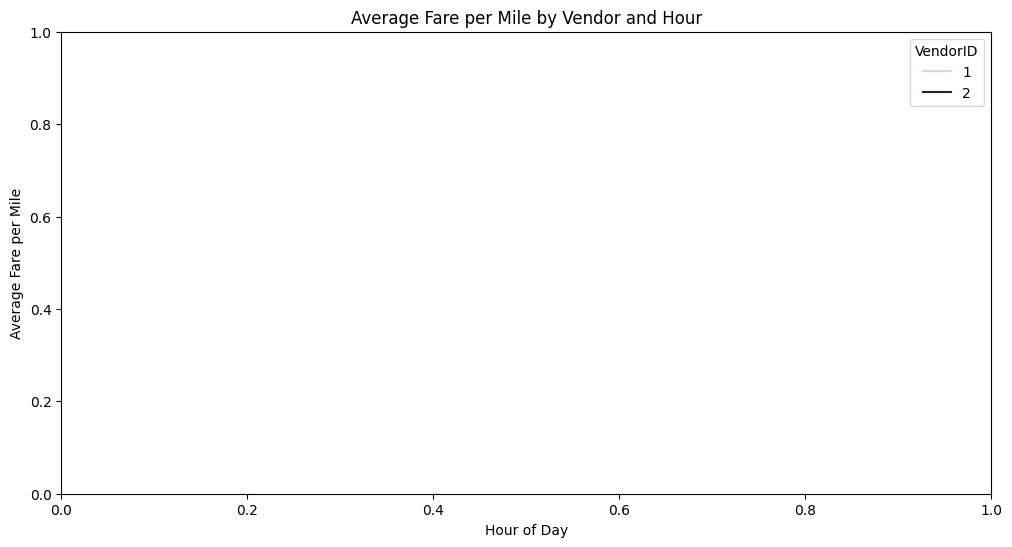

VendorID
1    inf
2    inf
Name: fare_per_mile, dtype: float64

In [69]:
# Compare fare per mile for different vendors
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Group by VendorID and hour, then calculate the average fare per mile
vendor_hourly_fare = df.groupby(['VendorID', df['tpep_pickup_datetime'].dt.hour])['fare_per_mile'].mean().reset_index()

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='tpep_pickup_datetime', y='fare_per_mile', hue='VendorID', data=vendor_hourly_fare)
plt.title('Average Fare per Mile by Vendor and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile')
plt.show()

# Comparison of fare per mile for different vendors
vendor_fare_comparison = df.groupby('VendorID')['fare_per_mile'].mean()
vendor_fare_comparison



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


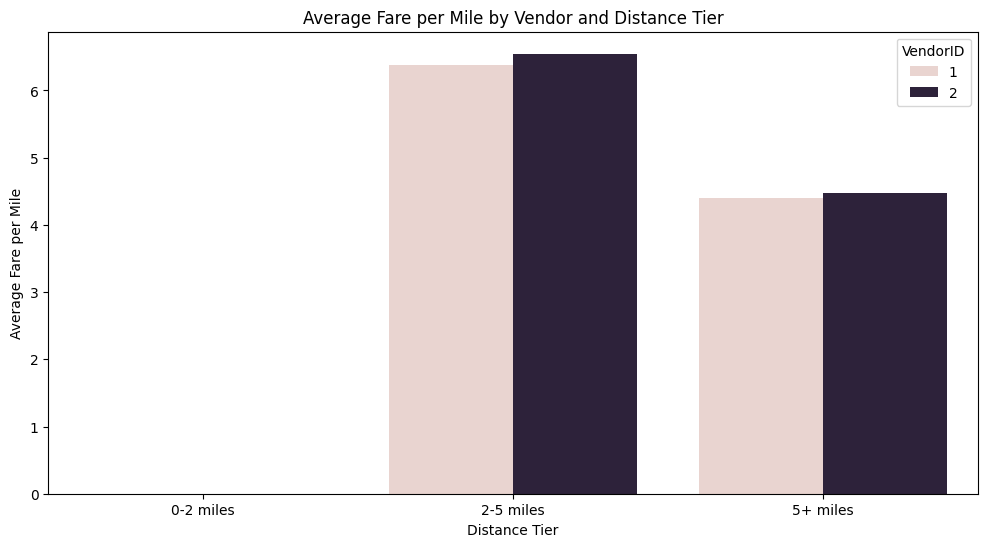

VendorID              1         2
distance_tier                    
0-2 miles           inf       inf
2-5 miles      6.378586  6.546134
5+ miles       4.403527  4.474462


In [70]:
# Defining distance tiers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and already loaded

# Define distance tiers
def categorize_distance(distance):
    if distance <= 2:
        return '0-2 miles'
    elif 2 < distance <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'

df['distance_tier'] = df['trip_distance'].apply(categorize_distance)

# Calculate fare per mile
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Group by vendor and distance tier, then calculate the average fare per mile
fare_comparison = df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()


# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='distance_tier', y='fare_per_mile', hue='VendorID', data=fare_comparison)
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.show()

# Print the results in a table format for better readability
print(fare_comparison.pivot(index='distance_tier', columns='VendorID', values='fare_per_mile'))



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

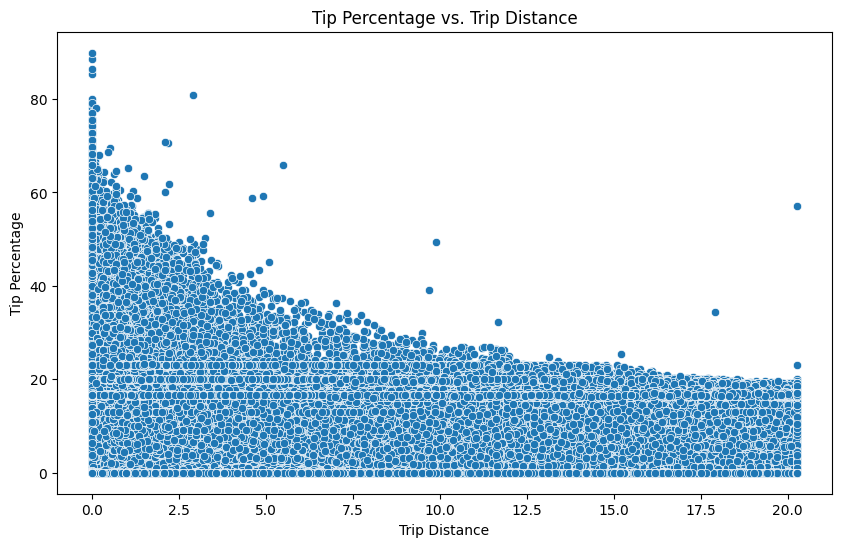

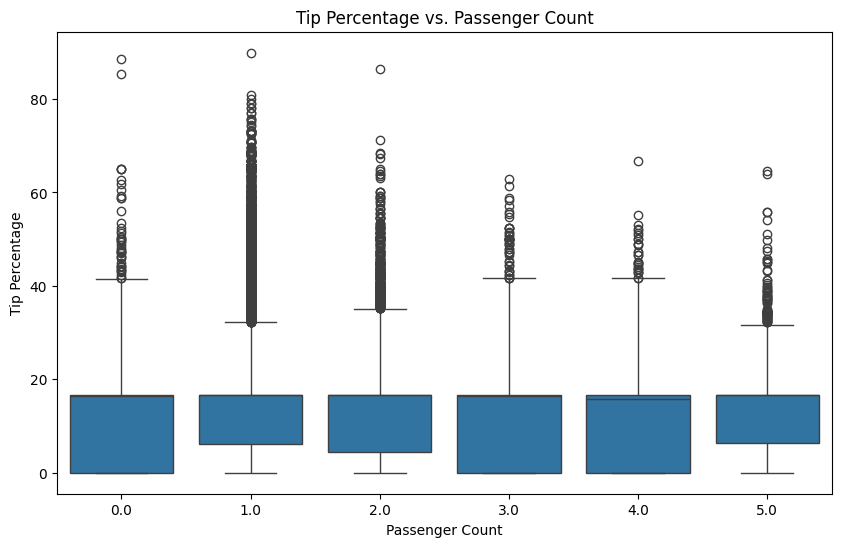

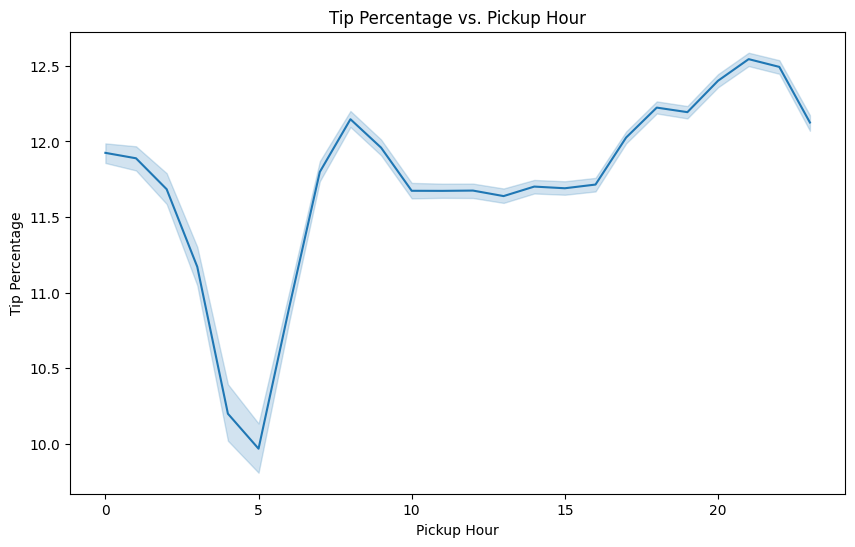

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


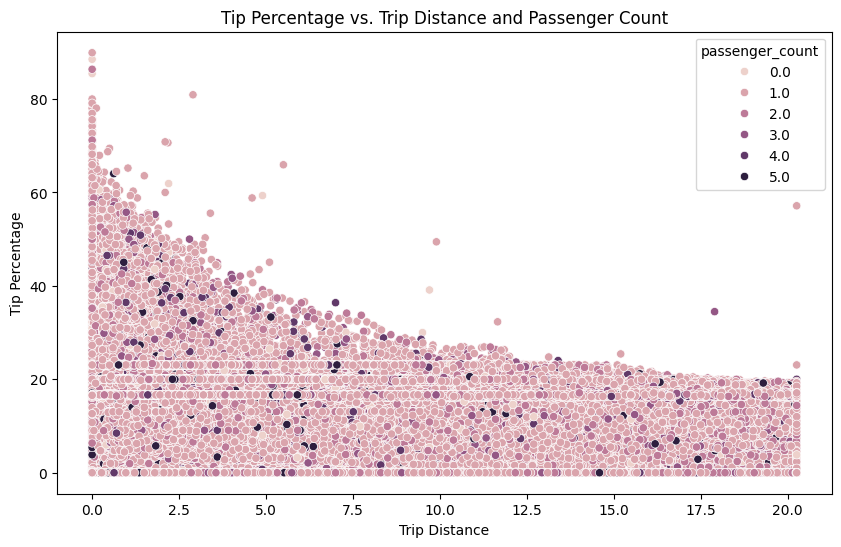

                 trip_distance  passenger_count  pickup_hour  tip_percentage
trip_distance         1.000000         0.043593    -0.003838       -0.039608
passenger_count       0.043593         1.000000     0.021641       -0.024191
pickup_hour          -0.003838         0.021641     1.000000        0.031432
tip_percentage       -0.039608        -0.024191     0.031432        1.000000
            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  passenger_count  \
count  444304.000000                      444304                      444304    444304.000000   
mean        1.709078  2023-07-01 09:43:27.042147  2023-07-01 10:03:04.305255         1.404568   
min         1.000000         2023-01-01 00:03:01         2023-01-01 00:09:35         0.000000   
25%         1.000000  2023-04-03 08:30:37.250000  2023-04-03 08:46:29.500000         1.000000   
50%         2.000000  2023-06-27 14:17:06.500000  2023-06-27 14:36:52.500000         1.000000   
75%         2.000000  2023-10-02 

In [71]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df' and has columns 'trip_distance', 'passenger_count', 'tpep_pickup_datetime', and 'tip_amount'
# Also assuming 'total_amount' column exists for the total fare amount

# Calculate tip percentage
df['tip_percentage'] = (df['tip_amount'] / df['total_amount']) * 100

# Analyze tip percentages based on distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_percentage', data=df)
plt.title('Tip Percentage vs. Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Percentage')
plt.show()

# Analyze tip percentages based on passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='tip_percentage', data=df)
plt.title('Tip Percentage vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage')
plt.show()

# Analyze tip percentages based on pickup time
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_hour', y='tip_percentage', data=df)
plt.title('Tip Percentage vs. Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Tip Percentage')
plt.show()

# Further analysis combining factors (example: distance and passenger count)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_percentage', hue='passenger_count', data=df)
plt.title('Tip Percentage vs. Trip Distance and Passenger Count')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Percentage')
plt.show()

# Correlation analysis
correlation_matrix = df[['trip_distance', 'passenger_count', 'pickup_hour', 'tip_percentage']].corr()
print(correlation_matrix)

# Further investigation for factors leading to low tip percentages (example: using a threshold)
low_tip_threshold = 5 # Example threshold for low tip percentage
low_tips_df = df[df['tip_percentage'] < low_tip_threshold]

# Analyze characteristics of trips with low tips
print(low_tips_df.describe()) # basic statistics
print(low_tips_df.groupby('passenger_count')['tip_percentage'].mean())



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [72]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

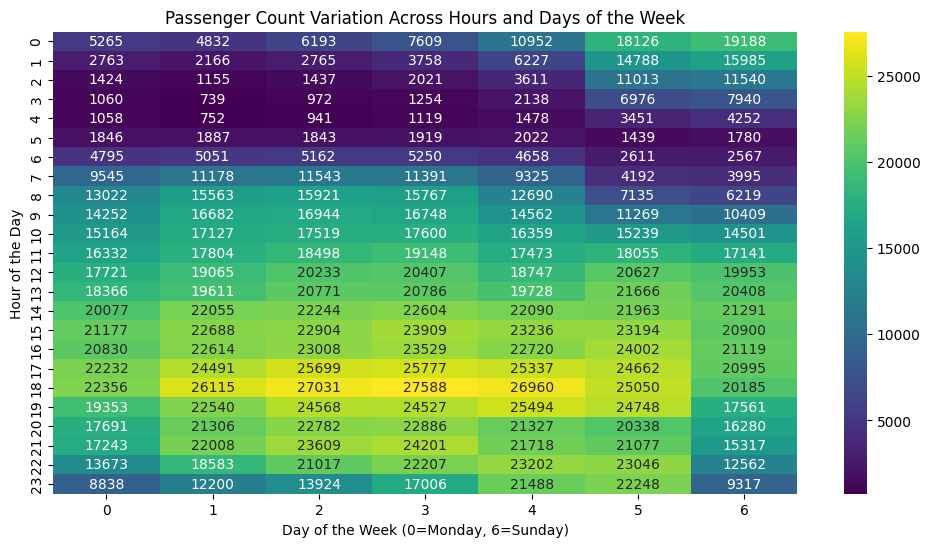

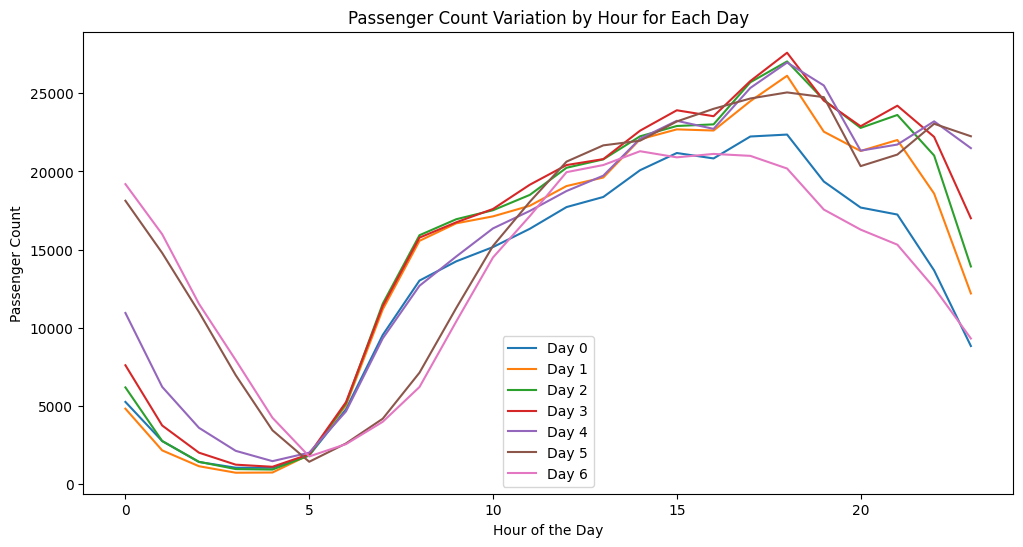

In [73]:
# See how passenger count varies across hours and days
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the hour and day of the week
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Group by hour and day of the week, then count passengers
passenger_variation = df.groupby(['hour', 'day_of_week'])['passenger_count'].sum().reset_index()

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(passenger_variation.pivot(index='hour', columns='day_of_week', values='passenger_count'),
            annot=True, fmt='g', cmap='viridis')  # Corrected line
plt.title('Passenger Count Variation Across Hours and Days of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Hour of the Day')
plt.show()

# Alternative visualization: Line plots for each day of the week
plt.figure(figsize=(12, 6))
for day in range(7):
    day_data = passenger_variation[passenger_variation['day_of_week'] == day]
    plt.plot(day_data['hour'], day_data['passenger_count'], label=f'Day {day}')

plt.xlabel('Hour of the Day')
plt.ylabel('Passenger Count')
plt.title('Passenger Count Variation by Hour for Each Day')
plt.legend()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

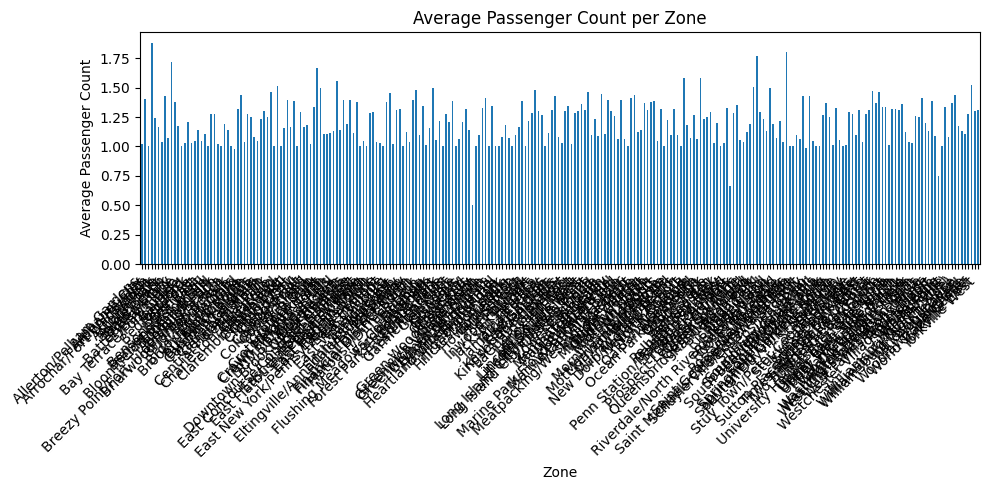

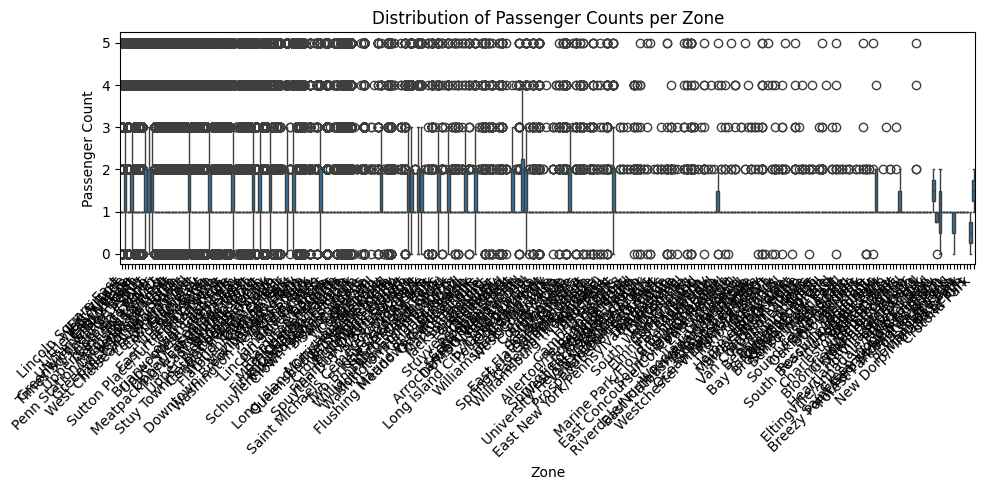

In [74]:
# How does passenger count vary across zones
zone_passenger_counts = df.groupby('PU_zone')['passenger_count'].mean()

# Plotting passenger counts across zones
plt.figure(figsize=(10, 5))
zone_passenger_counts.plot(kind='bar')
plt.title('Average Passenger Count per Zone')
plt.xlabel('Zone')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Further analysis: consider the distribution of passenger counts within each zone.
# Box plots can help visualize this.
plt.figure(figsize=(10, 5))
sns.boxplot(x='PU_zone', y='passenger_count', data=df)
plt.title('Distribution of Passenger Counts per Zone')
plt.xlabel('Zone')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
import geopandas as gpd
import os;
os.chdir('/content/drive/My Drive/Colab Notebooks')


# Read the shapefile using geopandas
zones = gpd.read_file(taxi_zones_path+'/taxi_zones.shp')
zones_with_trips = gpd.sjoin(zones, df, how='left', op='intersects')

# Calculate average passenger count per zone
zones_with_trips['average_passenger_count'] = zones_with_trips.groupby('zone')['passenger_count'].transform('mean')


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [76]:
# How often is each surcharge applied?
surcharge_columns = ['extra', 'mta_tax', 'improvement_surcharge'] # Replace with your actual surcharge column names

for col in surcharge_columns:
    if col in df.columns:  # Check if the column exists in the DataFrame
        surcharge_counts = df[col].value_counts()
        print(f"Frequency of surcharge '{col}':\n{surcharge_counts}\n")
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.\n")


# Analyze surcharges by pickup/dropoff zones and times
# Group by pickup zone and time and count surcharges

for col in surcharge_columns:
  if col in df.columns:
    # Group by pickup zone and hour and count surcharges
    pickup_surcharges = df.groupby(['PU_zone', df['tpep_pickup_datetime'].dt.hour])[col].sum().reset_index()

    # Group by dropoff zone and hour and count surcharges
    dropoff_surcharges = df.groupby(['DO_zone', df['tpep_dropoff_datetime'].dt.hour])[col].sum().reset_index()

    # Print or plot the results to identify zones and times with high surcharge frequencies
    print(f"Surcharge '{col}' by Pickup Zone and Hour:\n{pickup_surcharges.head(10)}\n")  # Show top 10 for brevity
    print(f"Surcharge '{col}' by Dropoff Zone and Hour:\n{dropoff_surcharges.head(10)}\n") # Show top 10 for brevity
  else:
    print(f"Warning: Column '{col}' not found in the DataFrame for surcharge analysis.\n")




Frequency of surcharge 'extra':
extra
0.000000    697383
2.500000    464390
1.000000    361713
5.000000    134258
3.500000    107354
7.500000     31050
6.000000     15541
4.250000      6382
1.750000      3239
3.750000      2620
6.750000      2271
2.750000      2214
1.250000      1404
2.250000       890
6.250000       796
7.250000       467
3.200000        43
3.000000        39
5.250000        22
0.500000        21
4.750000        12
0.750000        11
4.500000         8
1.500000         8
3.250000         8
2.450000         6
2.720000         5
2.000000         4
1.588023         3
0.700000         2
6.800000         2
3.050000         2
7.000000         2
0.250000         2
5.300000         1
0.190000         1
0.010000         1
0.030000         1
1.050000         1
2.200000         1
Name: count, dtype: int64

Frequency of surcharge 'mta_tax':
mta_tax
0.5    1832178
Name: count, dtype: int64

Frequency of surcharge 'improvement_surcharge':
improvement_surcharge
1.000000    1830565
0

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Implement dynamic pricing and dispatch strategies based on hourly demand fluctuations.

2. During peak hours (identified in 3.2.5), prioritize high-demand zones and consider surge pricing to incentivize drivers.

3. During off-peak hours, proactively reposition drivers to anticipate future demand shifts or to areas with lower driver density.

4. Utilize the revenue share analysis (3.2.8) to adjust driver incentives during different parts of the day.

5. Consider passenger count when dispatching vehicles, particularly for trips with high average fare per mile per passenger (3.2.9). This might involve deploying larger vehicles or coordinating rides with similar passenger counts.

6. Focus on top pickup and dropoff zones (3.2.5, 3.2.7).  Pre-position drivers in these high-demand zones, especially during peak hours.

7. For zones with high pickup/dropoff ratios (3.2.6), ensure adequate driver availability to meet demand.  Consider implementing strategies to reduce the imbalance.

8. During night hours, increase driver presence in areas with high nighttime
activity (3.2.7) without neglecting other areas.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [77]:
# Strategy:
# 1. Identify high-demand zones and hours (highest values on the heatmap).
# 2. Position more cabs in those areas during those times.
# 3. Consider the day of the week (using insights from 3.2.14) for further refinement of the strategy.
# 4. Rebalance during low-demand periods (observe the heatmap for low values)
# 5. Consider using the insights on fare per mile per passenger count to determine the size of the cars to be used to maximise profit.

# Consider day of the week:
# If a particular zone has higher demand on weekends than weekdays, adjust cab numbers accordingly.

# Other considerations:
# - Weather patterns (if available in dataset)
# - Special events in certain zones
# - Traffic patterns that affect travel times.
# - Dynamic pricing based on demand and travel times to maximise profit.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [78]:
# Analyze competitor pricing data (if available) to understand their pricing strategies in different zones and time periods.
# Example: If competitor A charges X during peak hours and Y during off-peak hours in zone Z, use this information as a benchmark.

# Dynamic Pricing based on Time and Location:
# Implement a dynamic pricing model that adjusts fares based on real-time demand, time of day, day of the week, and location.
#  - Peak hours and high-demand zones: Increase prices slightly (within competitive bounds).
#  - Off-peak hours and low-demand zones: Offer discounts or lower fares to incentivize ridership.
#  - Consider surge pricing during exceptional events (weather, major events) but carefully monitor its impact on customer satisfaction.
# Example:
#  -  df['adjusted_fare'] = df['fare_amount'] * (1 + (df['peak_hour_multiplier'] * df['high_demand_zone_multiplier']))

# Tiered Pricing based on Distance and Passenger Count:
# Refine the existing tiered pricing based on trip distance, considering passenger count and time of day.
# - Short trips: Slightly higher per-mile rates during peak hours, lower during off-peak hours.
# - Long trips: Consider discounts for off-peak hours, or premium rates during peak hours.
# - Passenger count adjustments: Slightly higher fares for trips with more passengers, reflecting the increased capacity used.

# Analyze the impact of surcharges:
# Analyze the current surcharge strategy and its impact on revenue and customer perception.
# - Consider whether the current surcharges are justified based on demand and operational costs.
# - If appropriate, adjust surcharge amounts to better reflect operational costs.


# Implement a feedback mechanism to adjust pricing in real-time:
# Collect customer feedback, and driver satisfaction to identify any issues with pricing adjustments.
# Monitor key metrics (revenue, ridership, customer satisfaction, driver earnings) to evaluate the effectiveness of pricing changes.
# Use A/B testing to compare the performance of different pricing strategies in different zones and times.

# Example code to show a sample adjustment (replace with actual logic)
# df['new_price'] = df.apply(lambda row: row['fare_amount'] * 1.1 if row['hour'] in [17,18,19] else row['fare_amount'], axis = 1)


# New Section